In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from dtw import dtw
from numpy.linalg import norm
import scipy.stats as stats
from sklearn import preprocessing
from itertools import permutations, combinations

In [9]:
dist_mat = pd.read_csv('../../dataset/dist_matrix120.csv', index_col=0)
trueData = pd.read_csv('../../dataset/processed.csv', index_col=0)
window_size = 120

C:\Users\navee\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


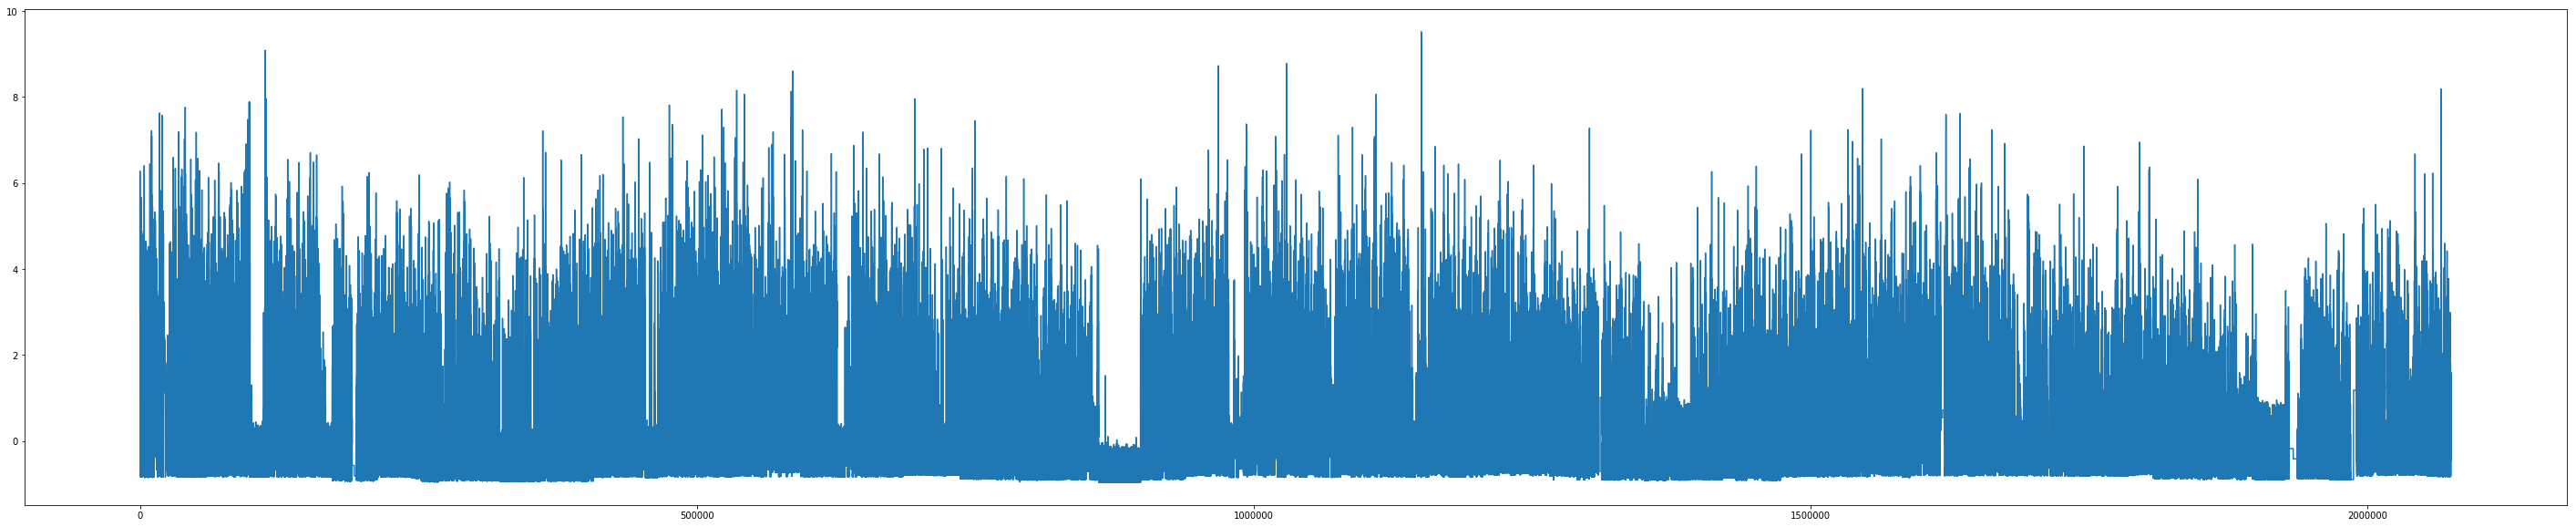

In [10]:
plt.figure(figsize=(50,10))
plt.plot(trueData['Global_active_power'])
plt.show()

In [11]:
dist_mat = np.array(dist_mat)+np.transpose(np.array(dist_mat))

In [14]:
X=[]
for i in range(0, len(trueData)-window_size, int(window_size/2)):
    X.append(trueData[i:i+window_size]['Global_active_power'].values)

In [15]:
distance_df = pd.DataFrame(dist_mat)

In [71]:
# Pass in dist_mat: distance matrix
def den_cluster(eps_, reassign=-1):
    density_clusters = []
    density_buffer = []
    
    anomaly_sigs = []
    
    cut_off_dist = eps_
    #clust_size_cut_off = min(int(len(X)/200), 5)
    #clust_size_cut_off = max(clust_size_cut_off, 2)
    clust_size_cut_off = 5

    #print("Cut off:", cut_off_dist, "Cluster Cut Off: ", clust_size_cut_off)

    for i,j in enumerate(dist_mat):
        density_buffer.append(i)
        for k,l in enumerate(j):
            if ((l<=cut_off_dist) and (l>0)):
                if k not in density_buffer:
                    density_buffer.append(k)

        if len(density_buffer)<clust_size_cut_off:
            anomaly_sigs.append(i)

        density_clusters.append(density_buffer)
        density_buffer = []
    '''
    if(reassign==1):
        og_denity_clusters = copy.deepcopy(density_clusters)
    '''
    density_clusters = sorted(density_clusters, key=len, reverse=True)
 
    
    for i,j in enumerate(density_clusters):
        for l,m in enumerate(density_clusters):
            if l>i:
                density_clusters[l] = list(set(m)-set(j))
    
    '''
    for i in range(len(density_clusters)):
        for j in range(i, len(density_custers)):
            density_clusters[j] = list(set(density_clusters[j]) - set(density_clusters[i]))
    '''        
    if reassign==1:
        
        density_clusters = [list(set(x)-set(anomaly_sigs)) for x in density_clusters]
        #print(density_clusters)
        
        for z in range(0, len(density_clusters)):
            if len(density_clusters[z]) >= clust_size_cut_off:
                clus_dis = []
                
                for i in combinations(density_clusters[z], 2):
                    clus_dis.append(dist_mat[i[0],i[1]])
                    
                #print(density_clusters[z])

                #for i in density_clusters[z]:
                i = 0
                while(i<len(density_clusters[z])):
                    
                    #print(i, np.mean(dist_mat[i,list(set(density_clusters[z])-set([i]))]), np.mean(clus_dis))
                    #print(density_clusters[z])
                    
                    if np.mean(dist_mat[density_clusters[z][i],list(set(density_clusters[z])-set([density_clusters[z][i]]))])> (np.mean(clus_dis)):
                        density_clusters.append([density_clusters[z][i]])
                        #print(density_clusters[z][i])
                        density_clusters[z].remove(density_clusters[z][i])
                        
                    else:
                        i+=1
            
        ''' 
        common_points = og_density_clusters - density_clusters
        
        for i in range(len(common_points)):
            for j in range(len(common_points[i])):
                for k in range(len(density_clusters)):
                    for l in range(len(density_clusters[k])):
                        if(common_points[i][j] == density_clusters[k][l]):
                            if(dist_mat[i][common_points[i][j]]<dist_mat[k][])
        
        '''

       
    
        
    return density_clusters, clust_size_cut_off

In [76]:
eps = 0.1
density_clusters, cut_off = den_cluster(eps, reassign=0)


Wavelet Count 34586 Cluster Count: 98 Cluster size cut off: 5 EPS:  0.1
Cluster Size: 20 Cluster # 0


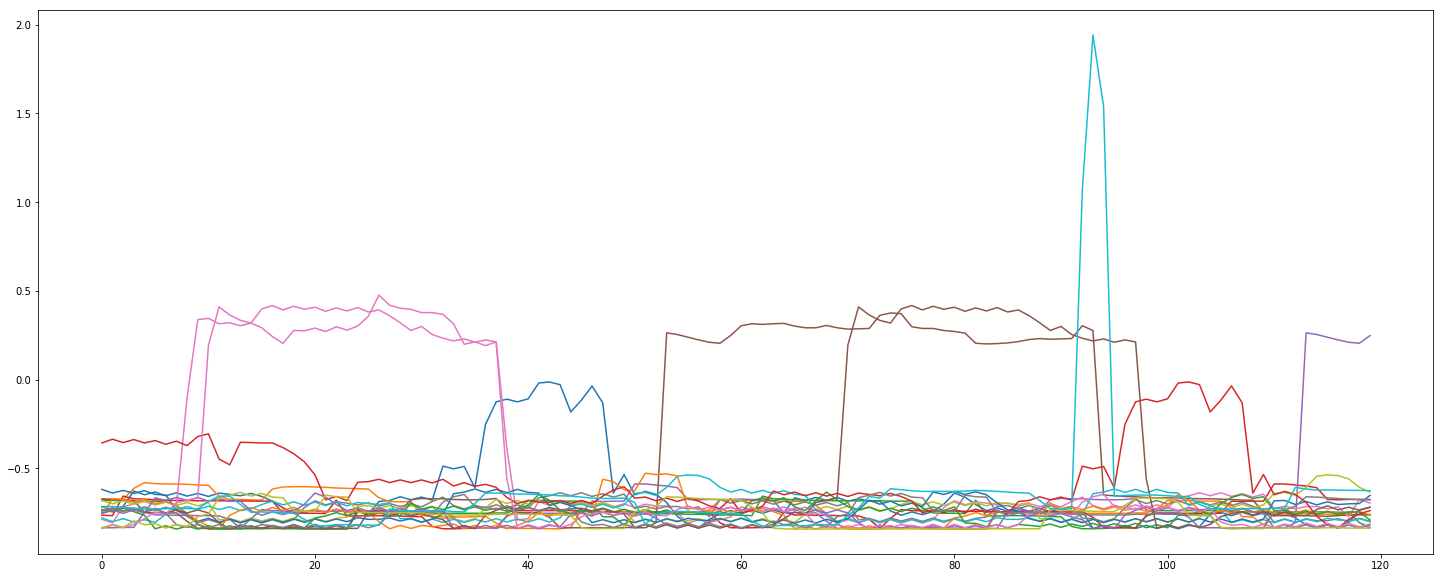

Cluster Size: 7 Cluster # 1


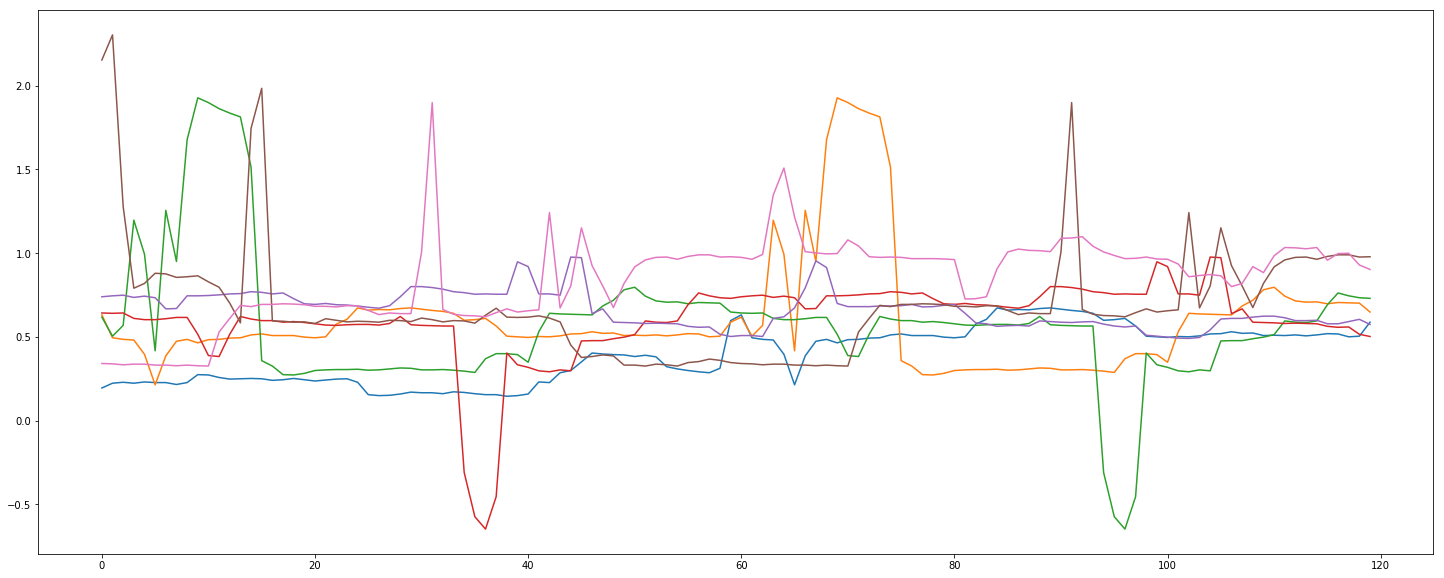

Cluster Size: 3 Cluster # 2


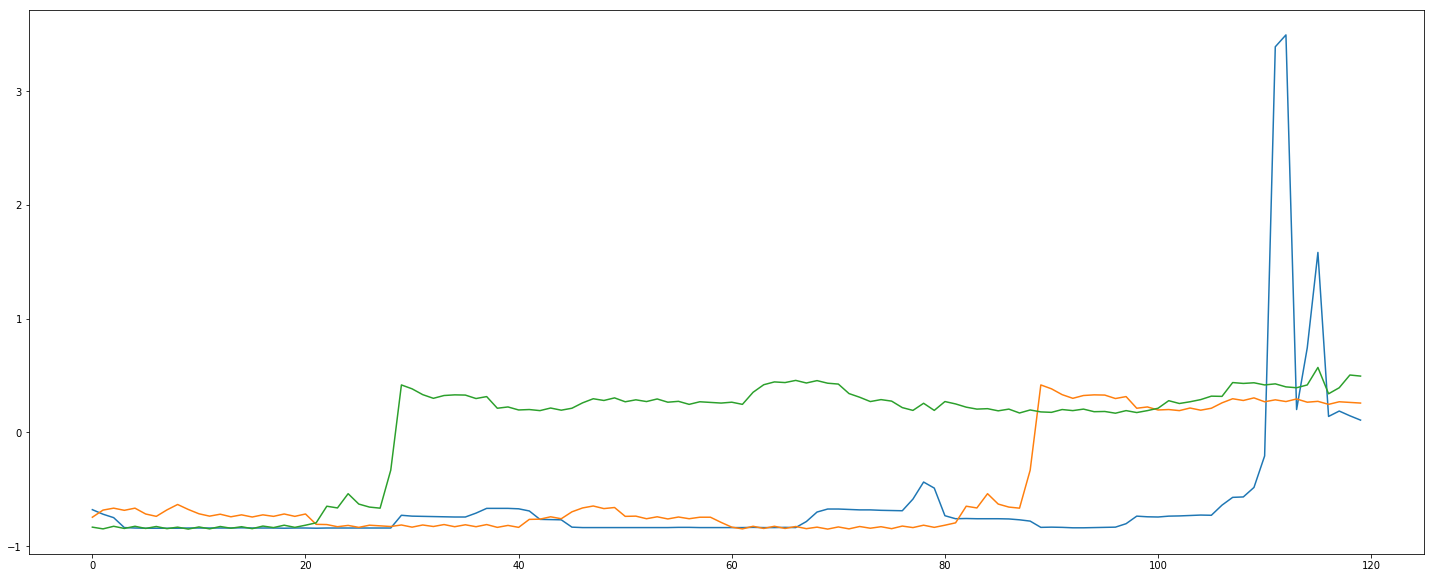

Cluster Size: 3 Cluster # 3


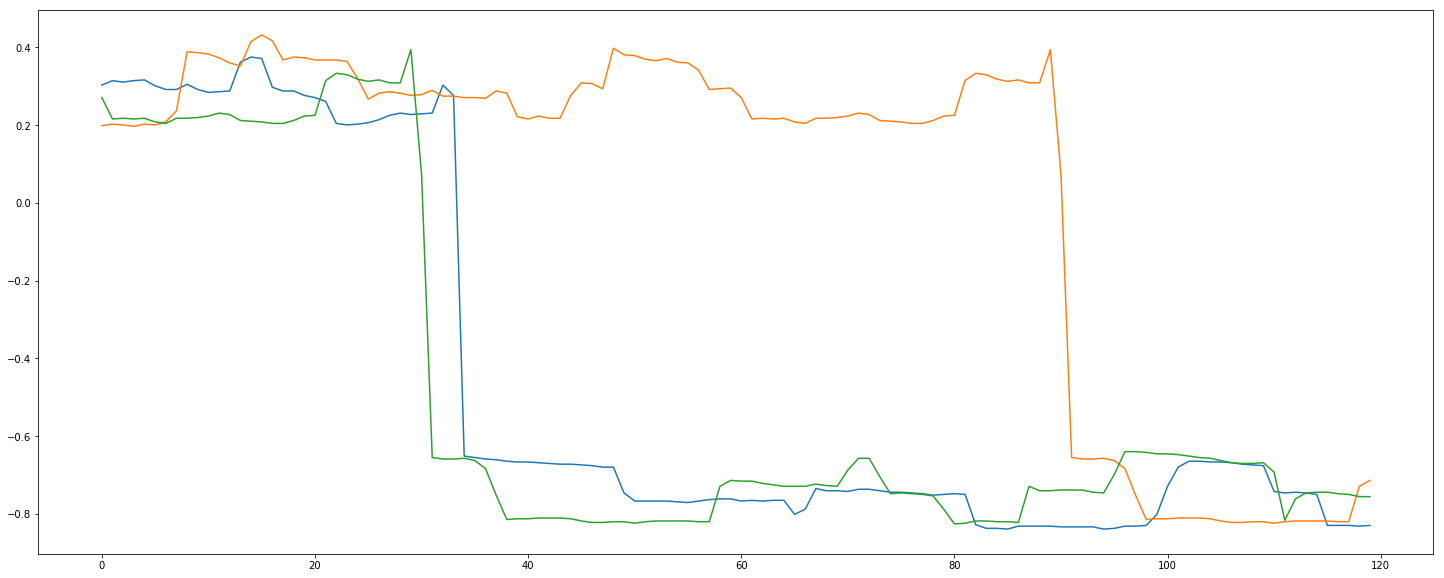

Cluster Size: 3 Cluster # 4


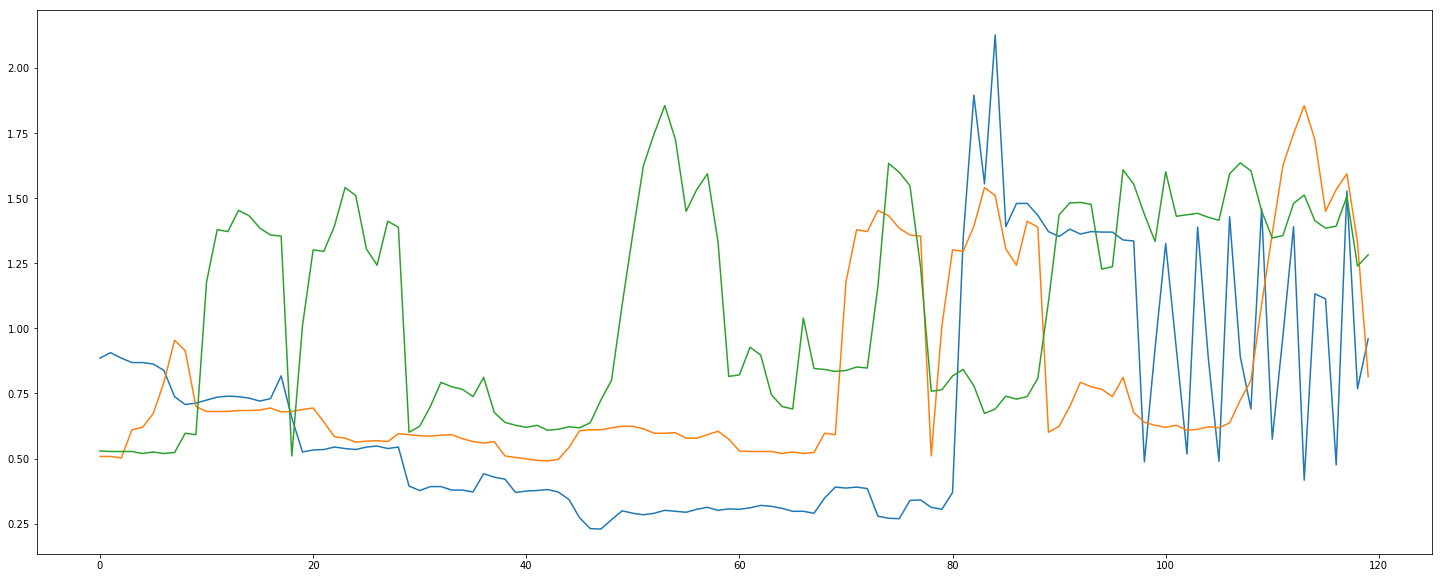

Cluster Size: 2 Cluster # 5


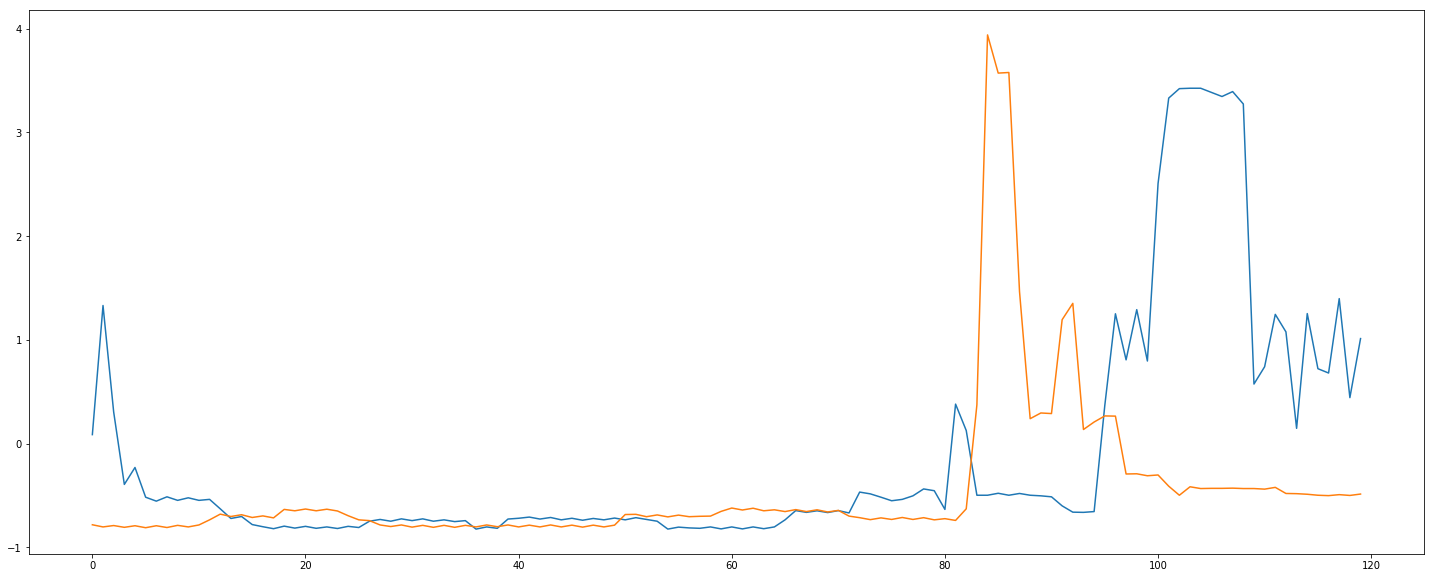

Cluster Size: 2 Cluster # 6


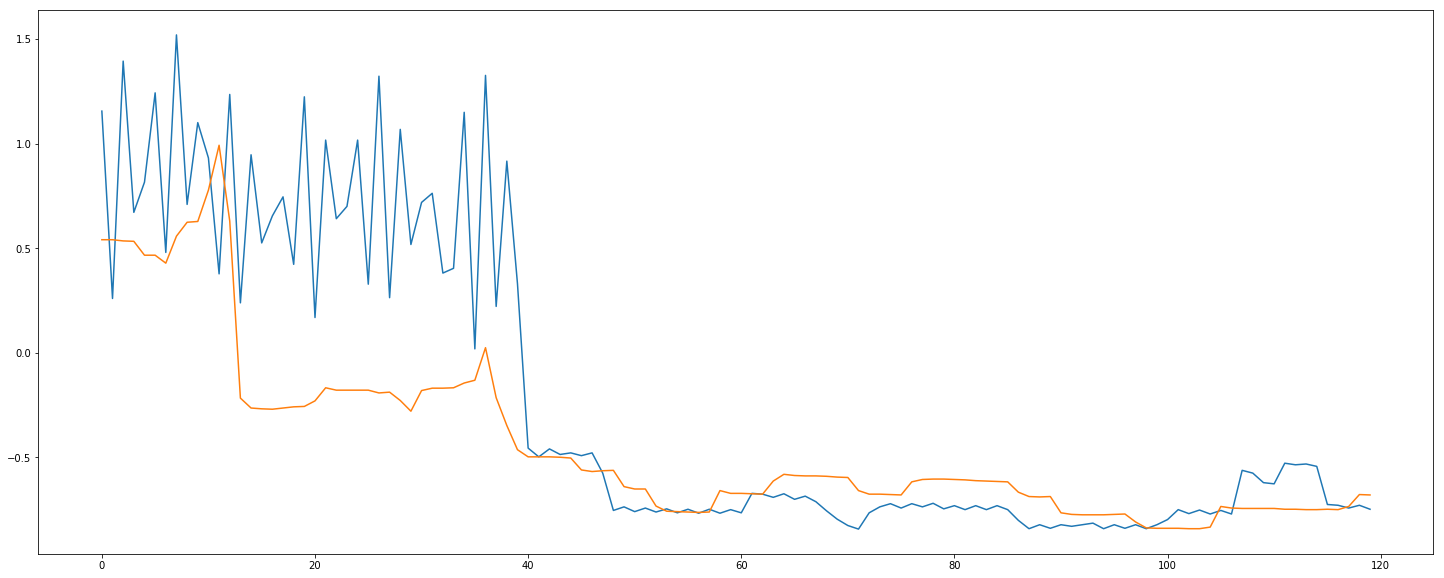

Cluster Size: 2 Cluster # 7


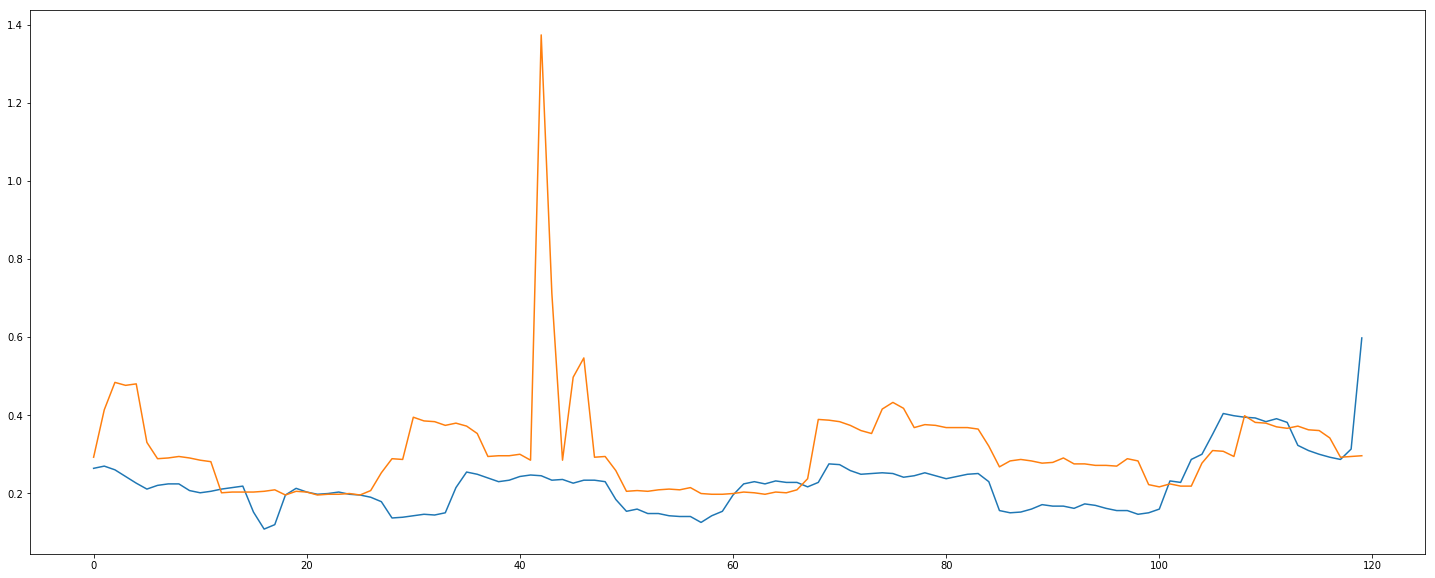

Cluster Size: 2 Cluster # 8


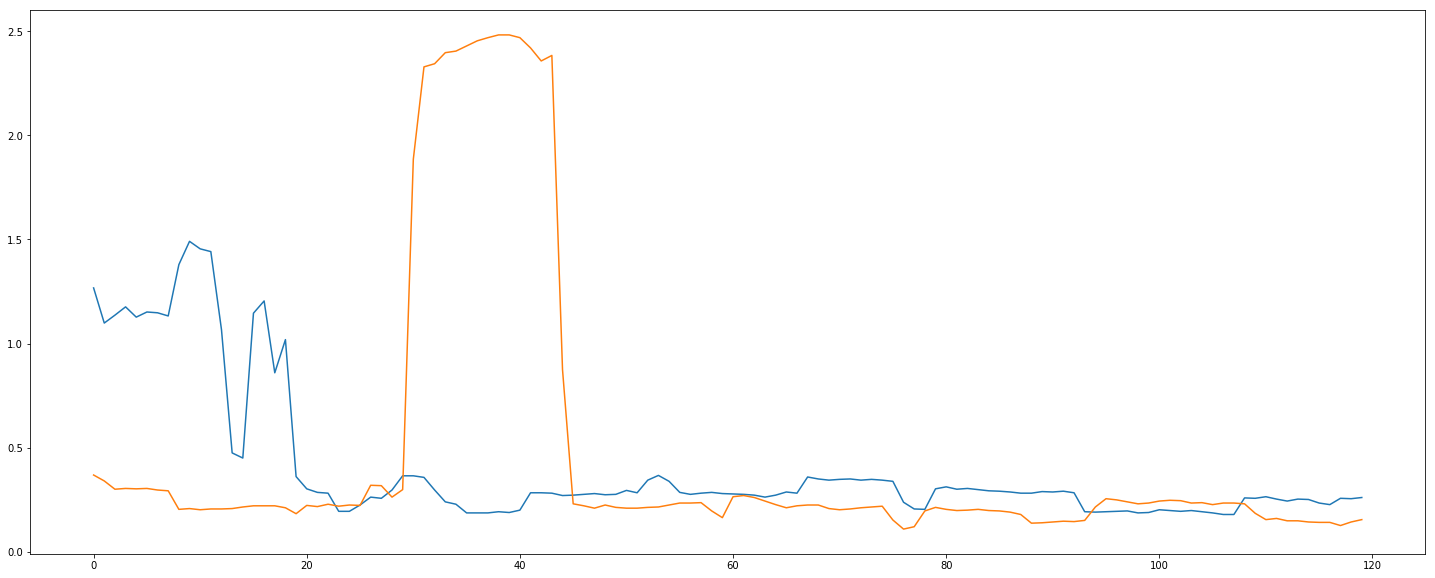

Cluster Size: 2 Cluster # 9


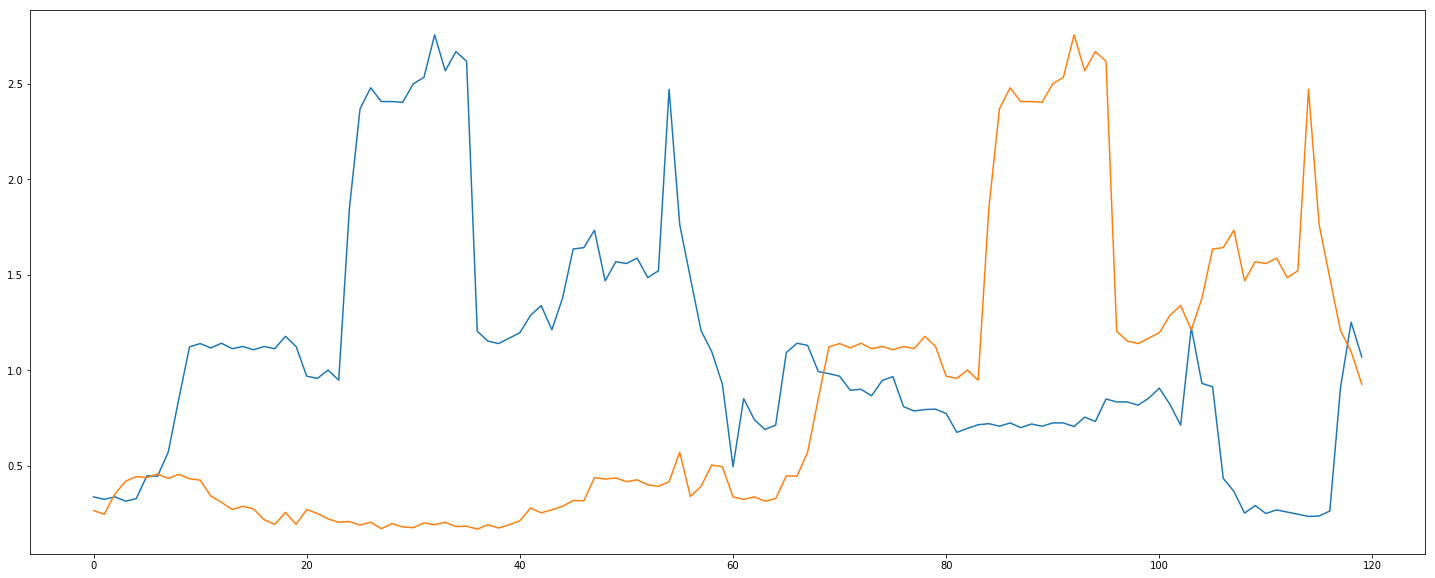

Cluster Size: 1 Cluster # 10


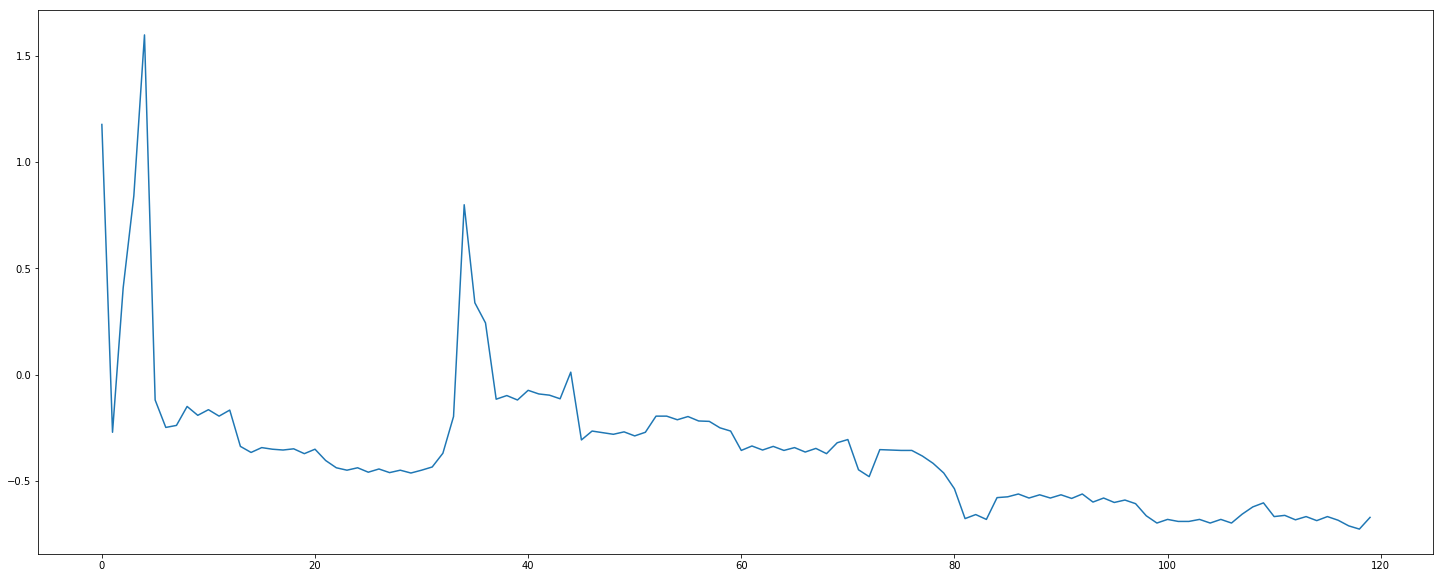

Cluster Size: 1 Cluster # 11


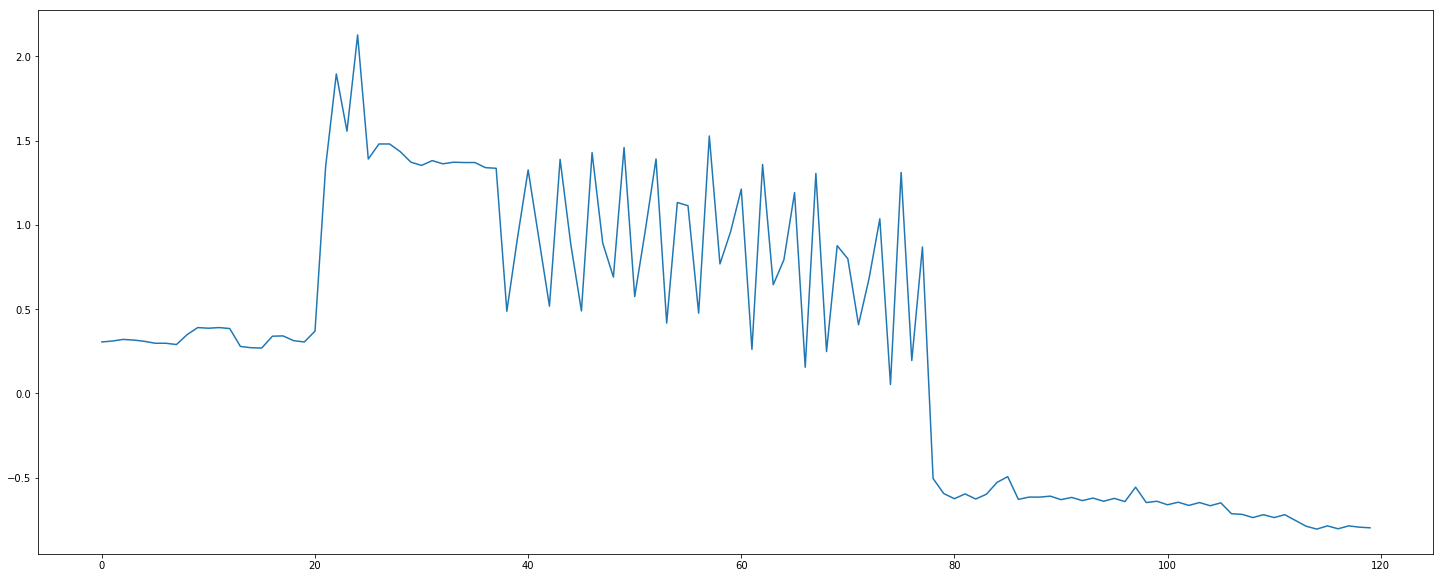

Cluster Size: 1 Cluster # 12


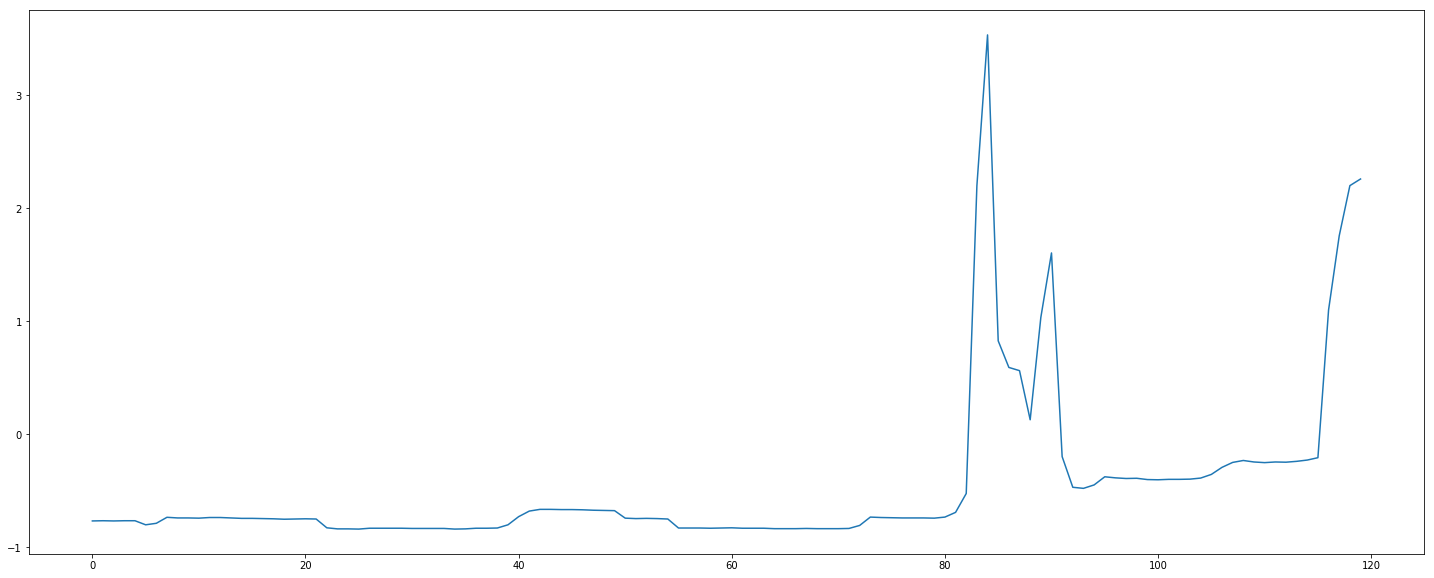

Cluster Size: 1 Cluster # 13


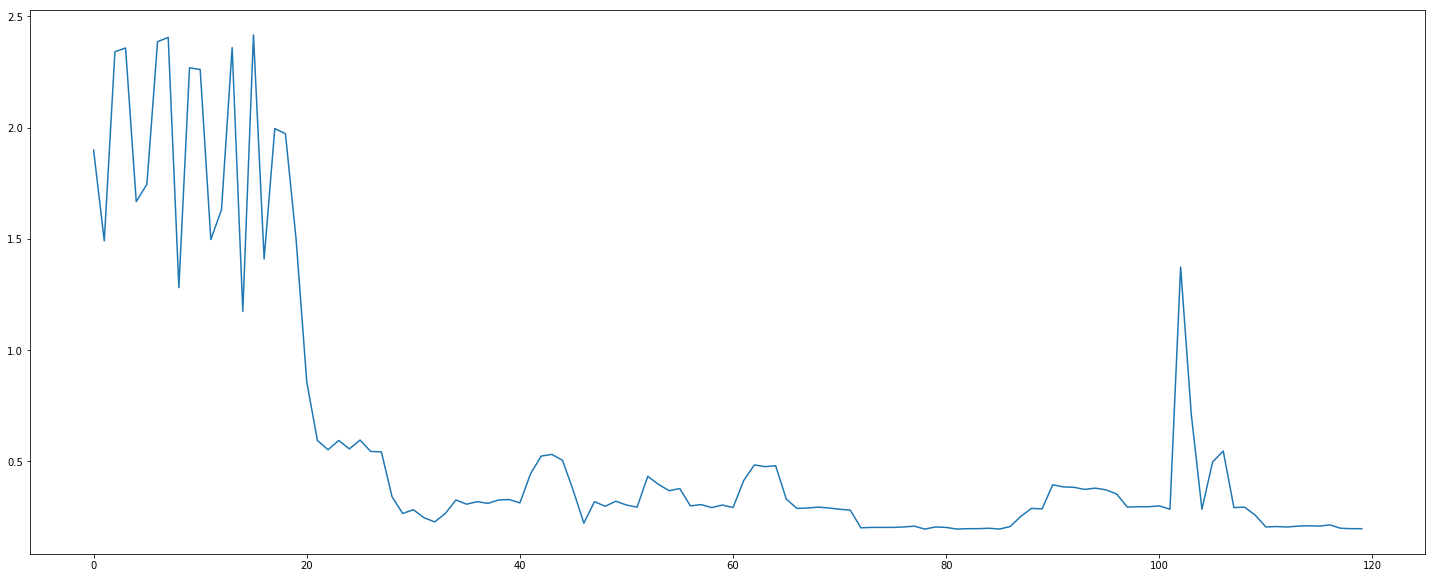

Cluster Size: 1 Cluster # 14


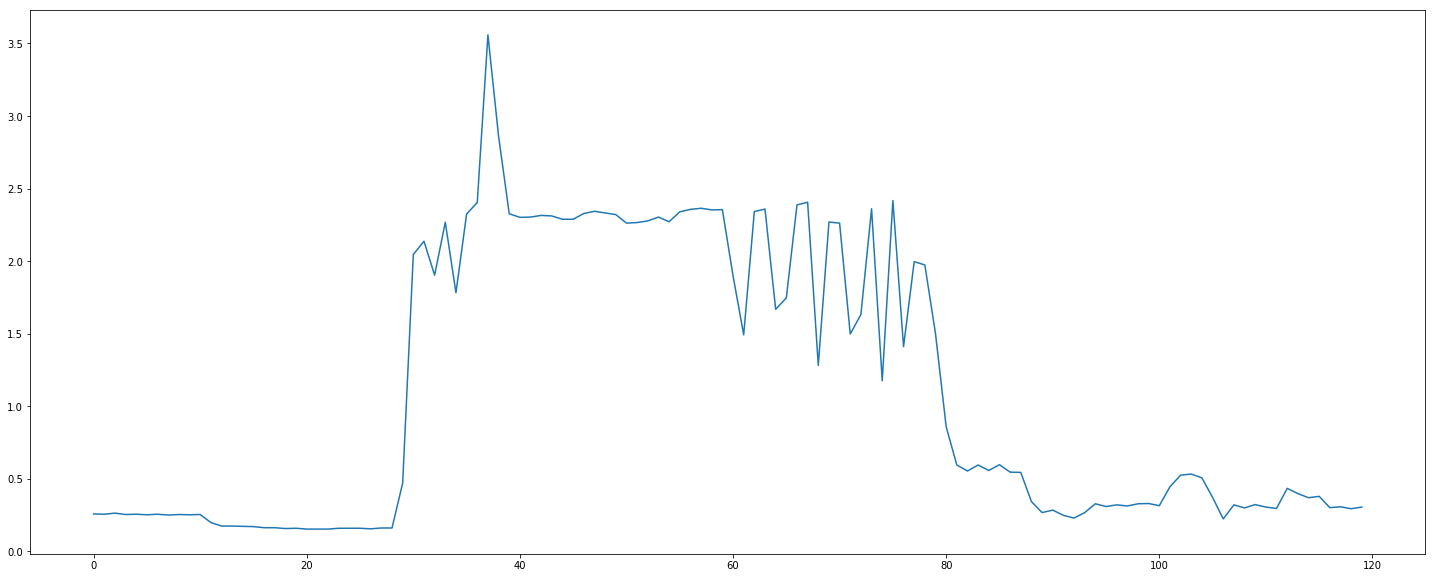

Cluster Size: 1 Cluster # 15


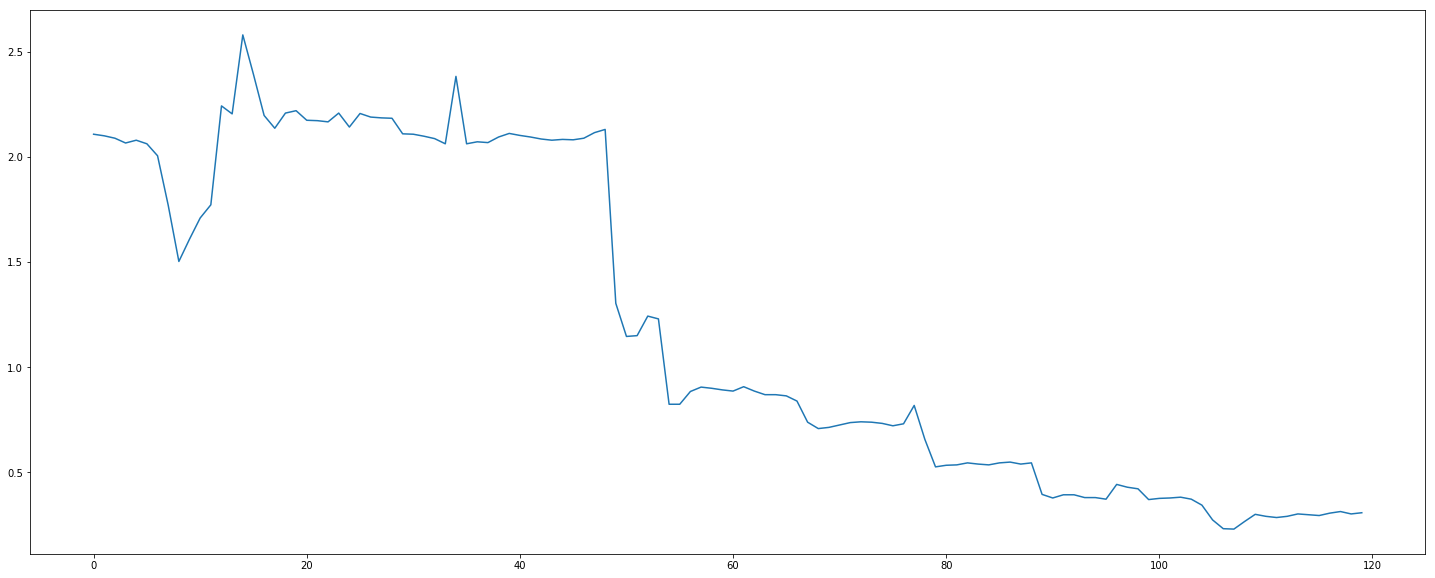

Cluster Size: 1 Cluster # 16


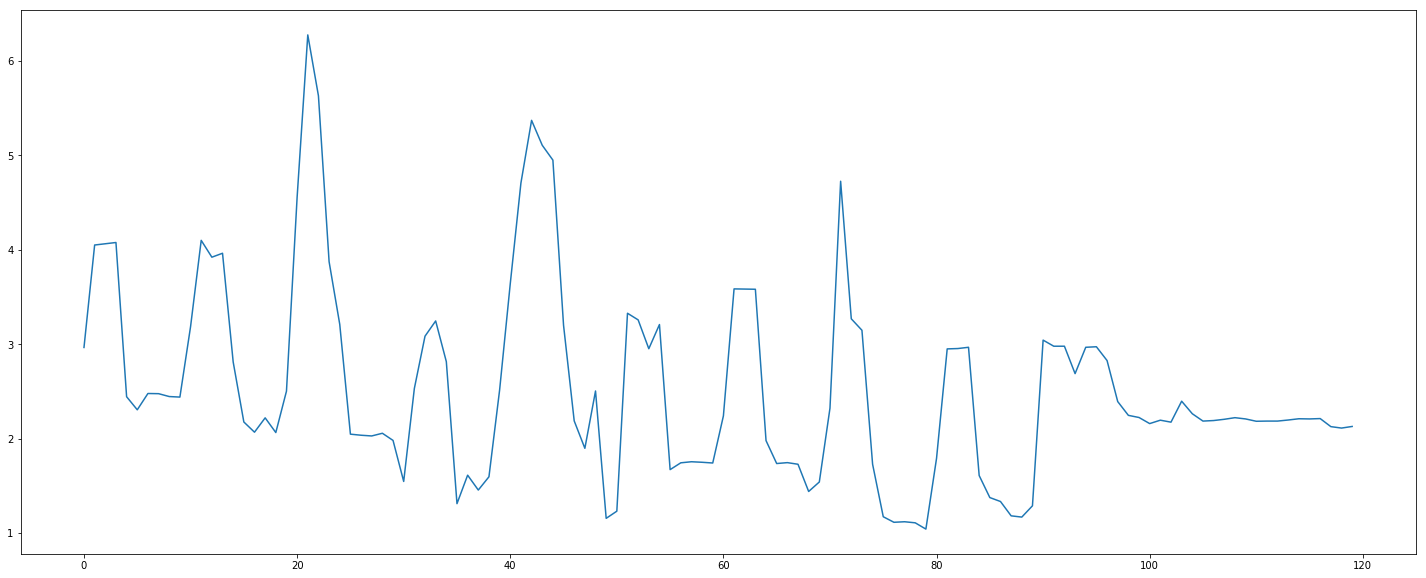

Cluster Size: 1 Cluster # 17


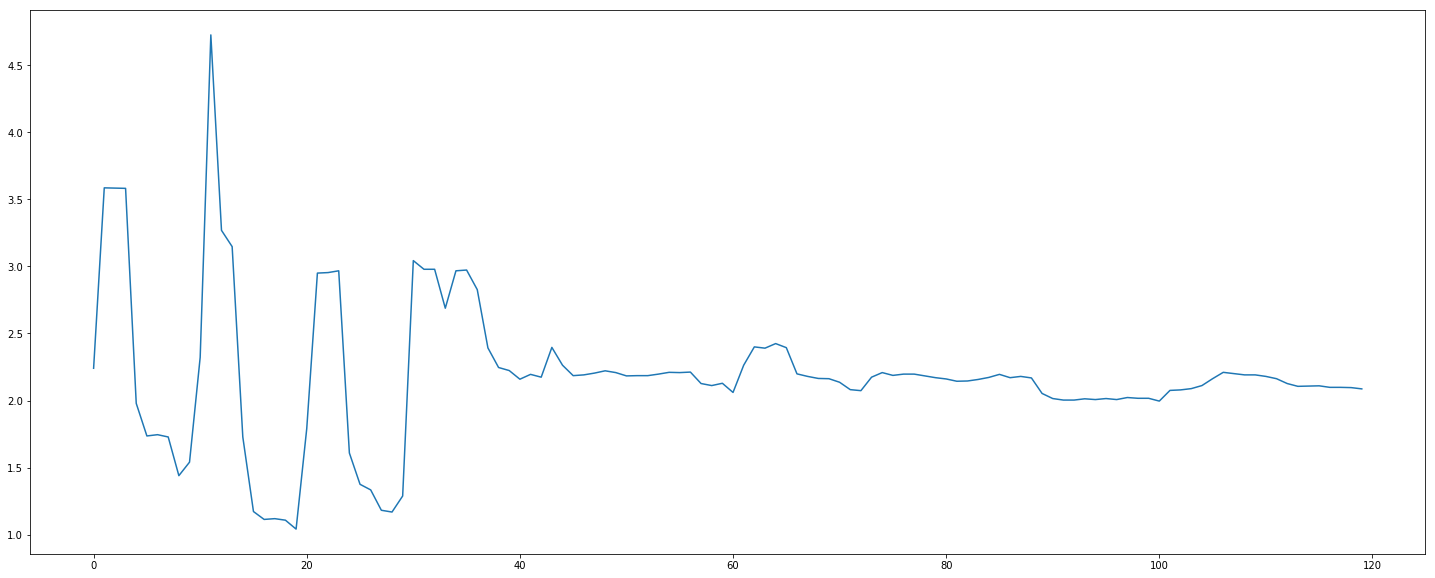

Cluster Size: 1 Cluster # 18


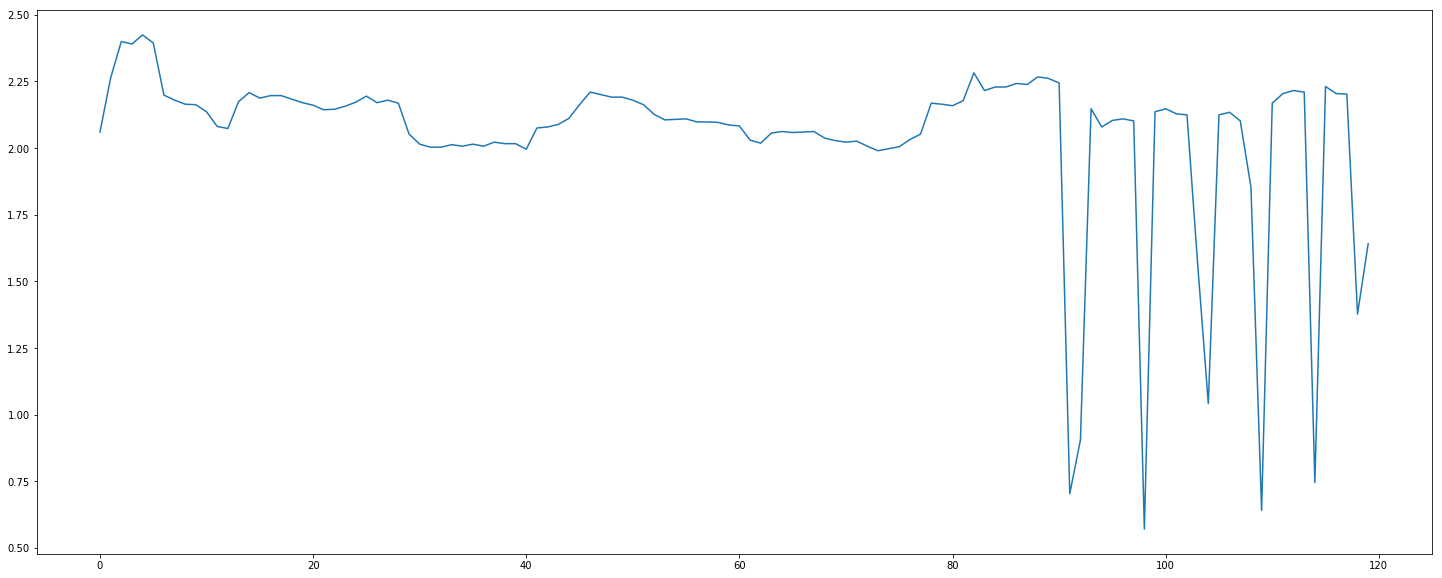

Cluster Size: 1 Cluster # 19


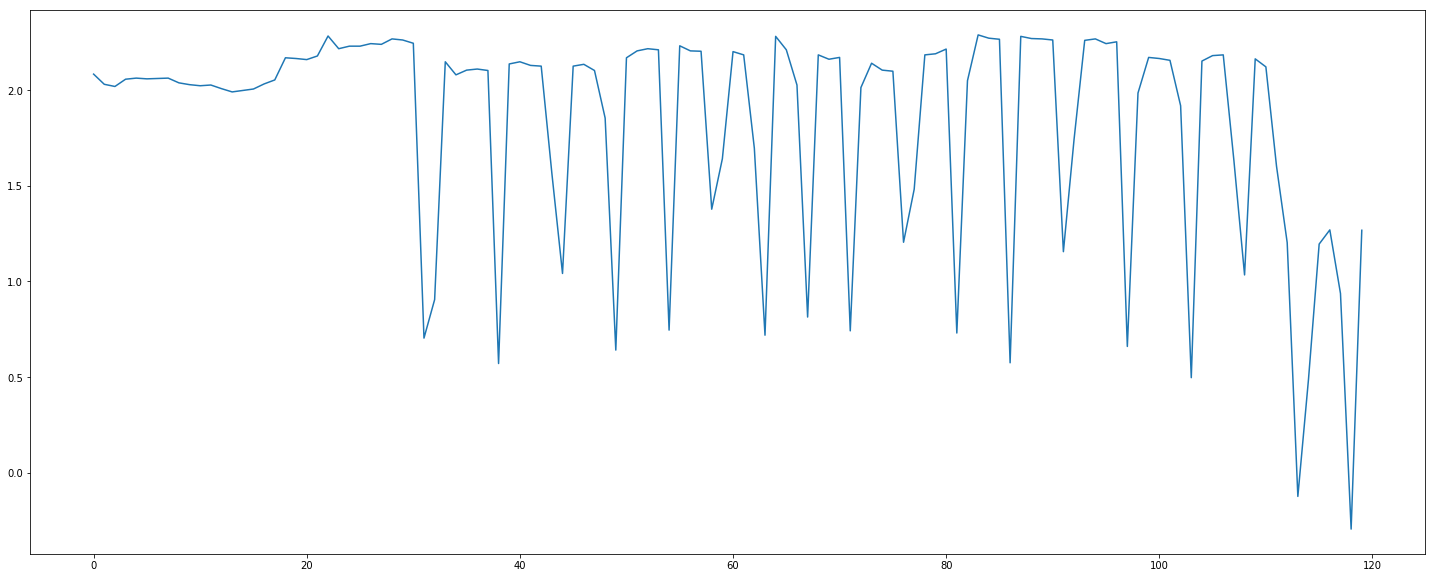

Cluster Size: 1 Cluster # 20


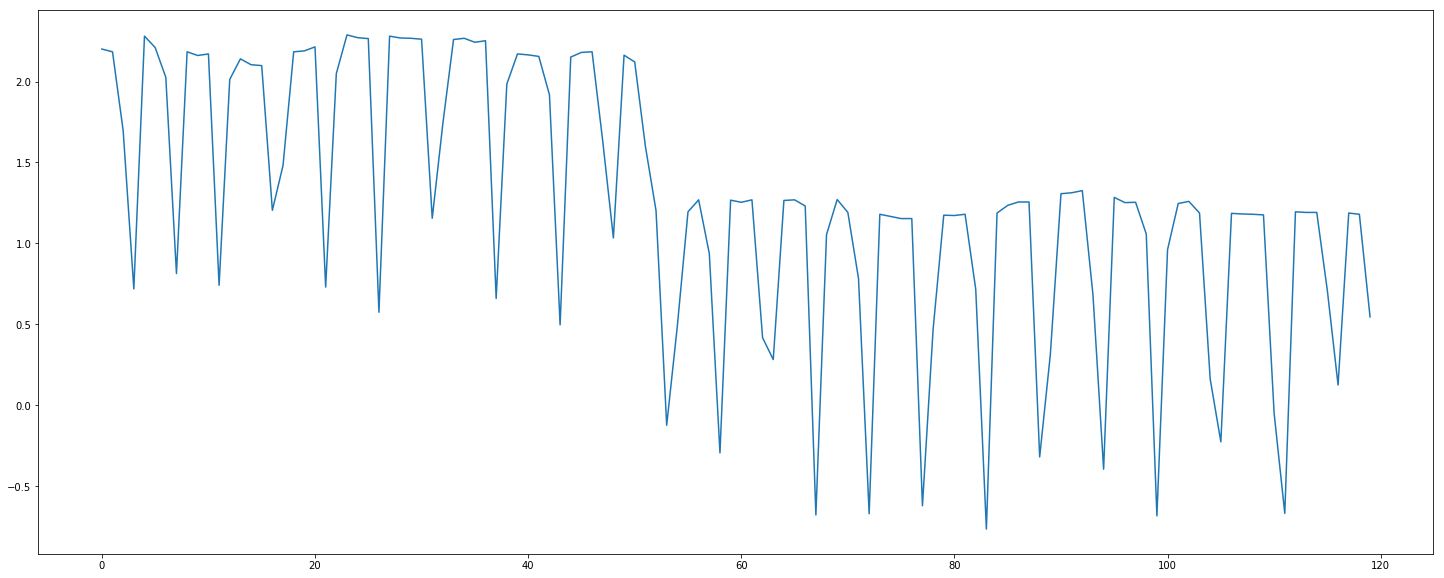

Cluster Size: 1 Cluster # 21


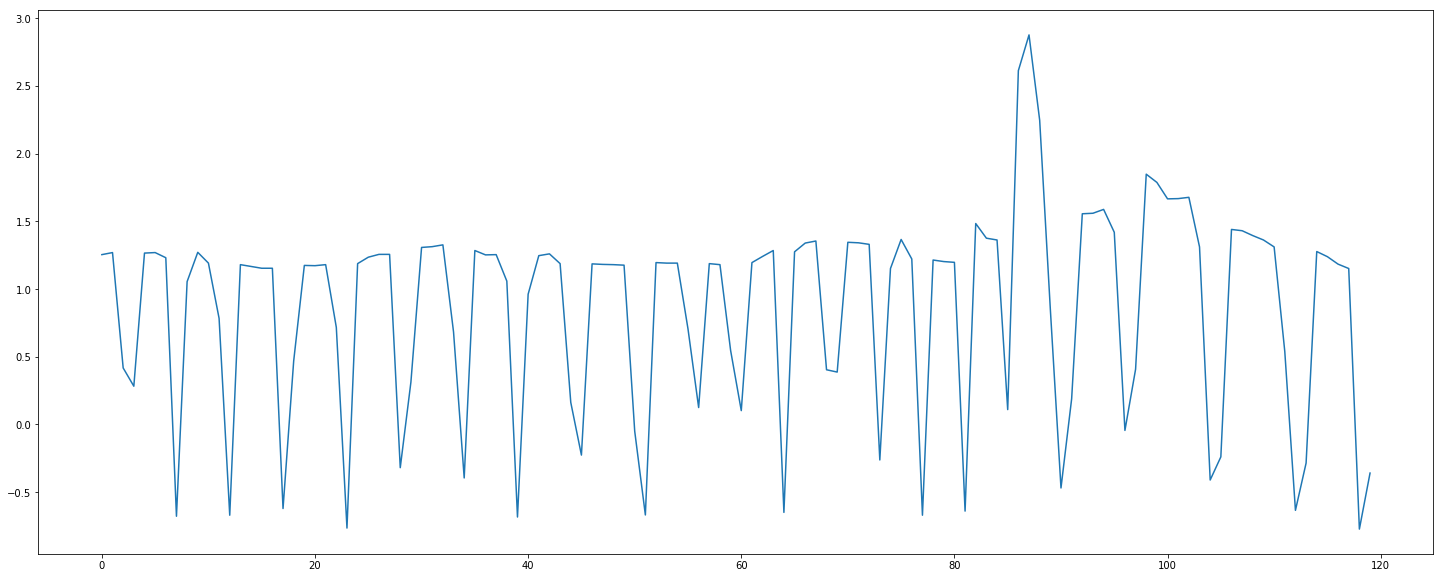

Cluster Size: 1 Cluster # 22


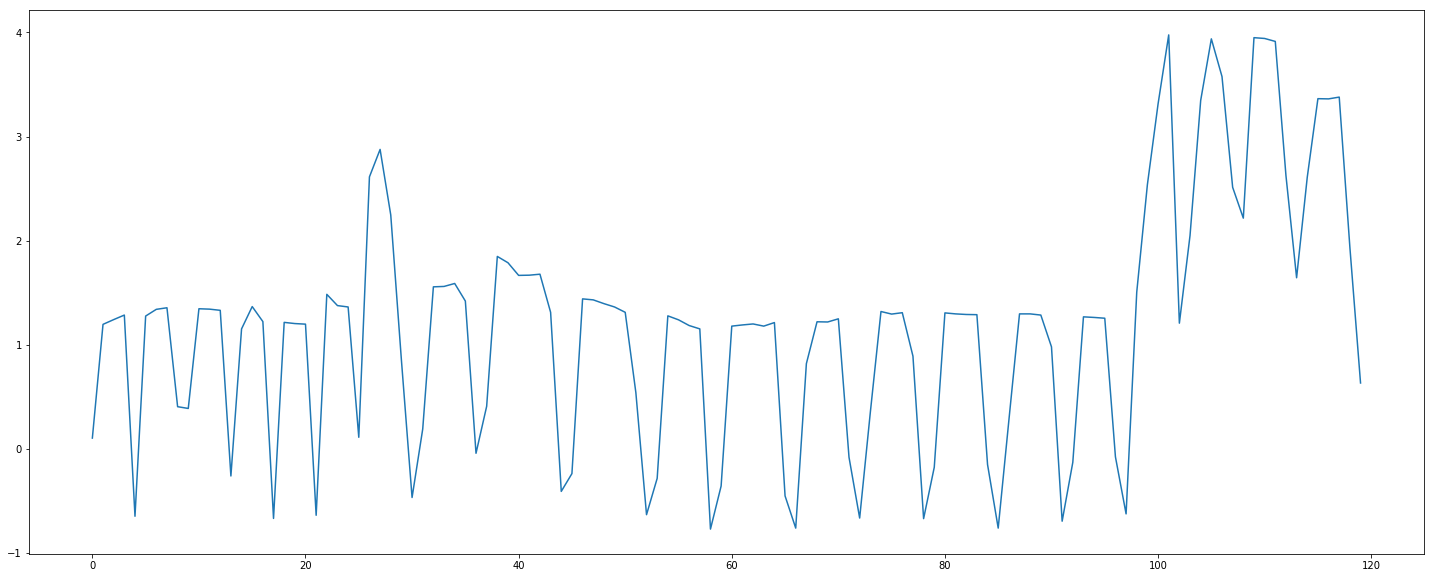

Cluster Size: 1 Cluster # 23


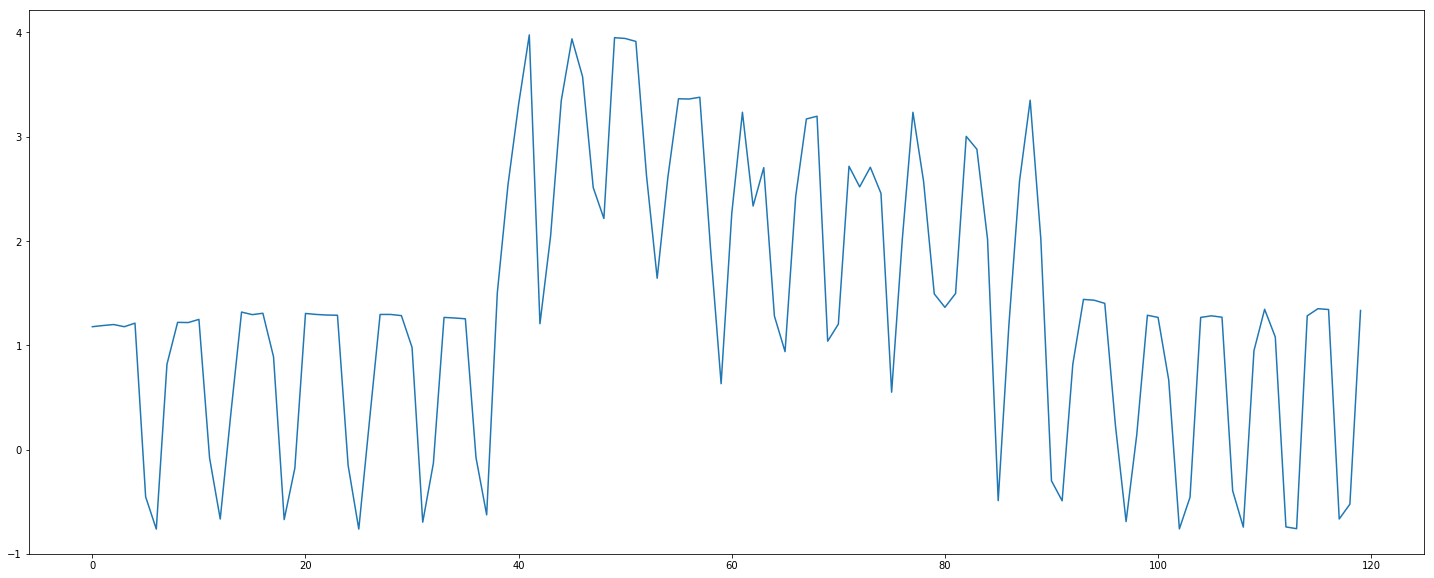

Cluster Size: 1 Cluster # 24


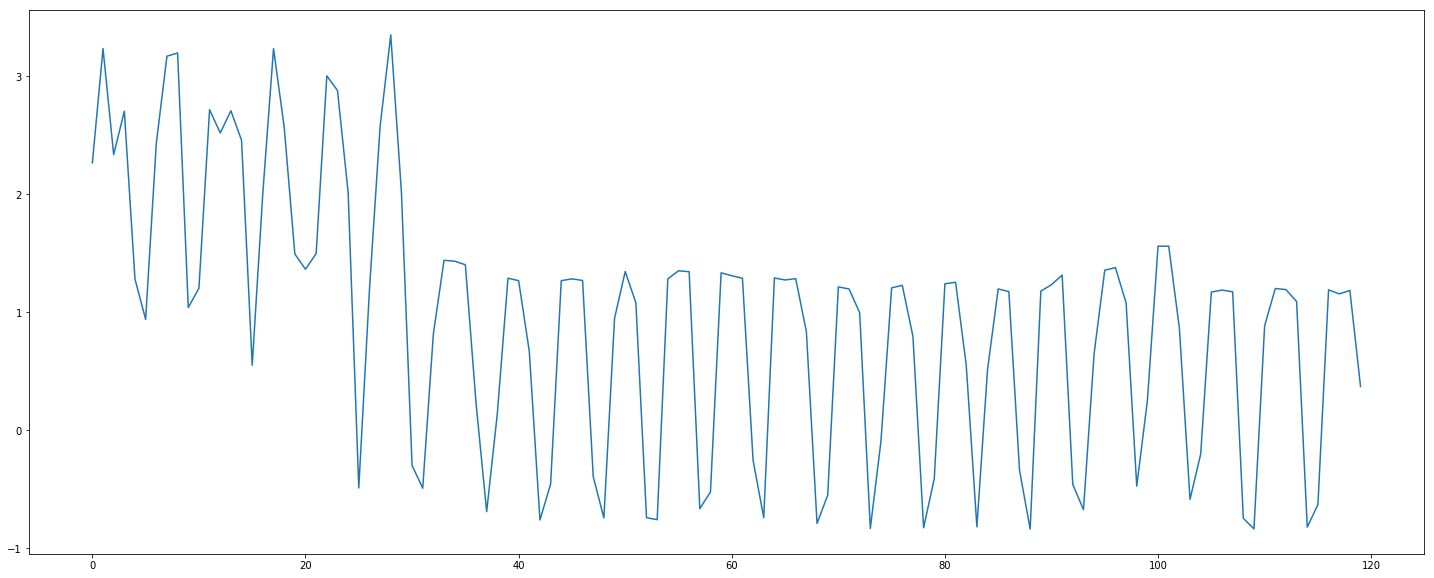

Cluster Size: 1 Cluster # 25


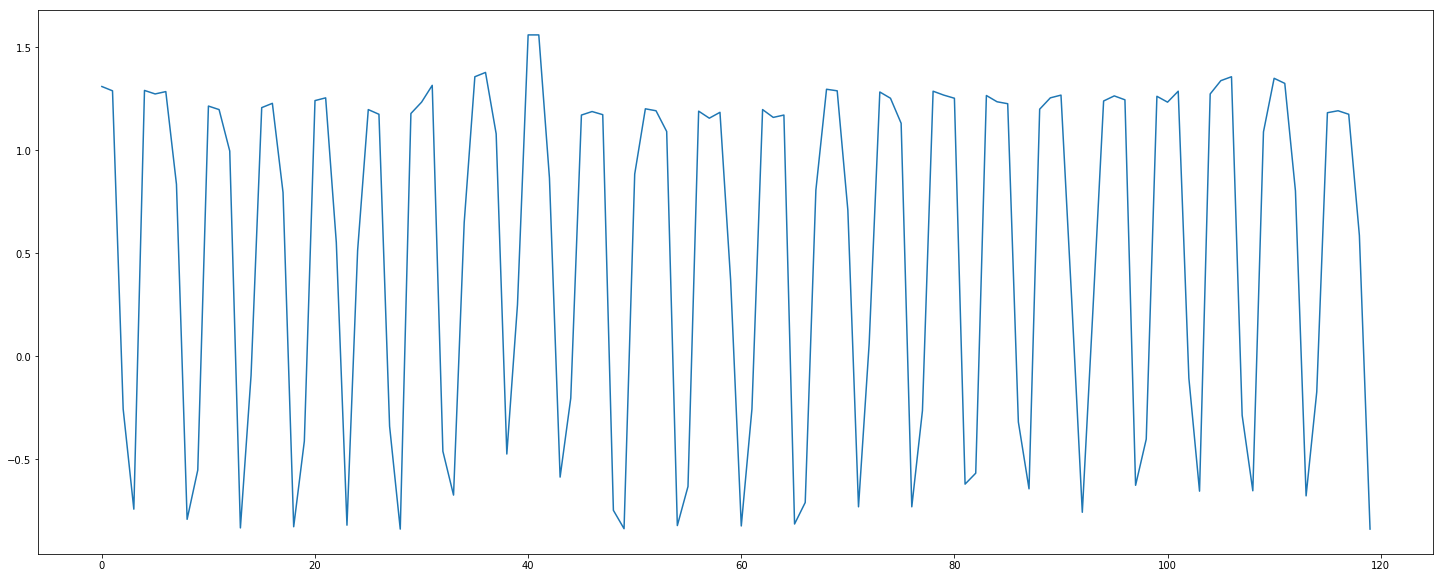

Cluster Size: 1 Cluster # 26


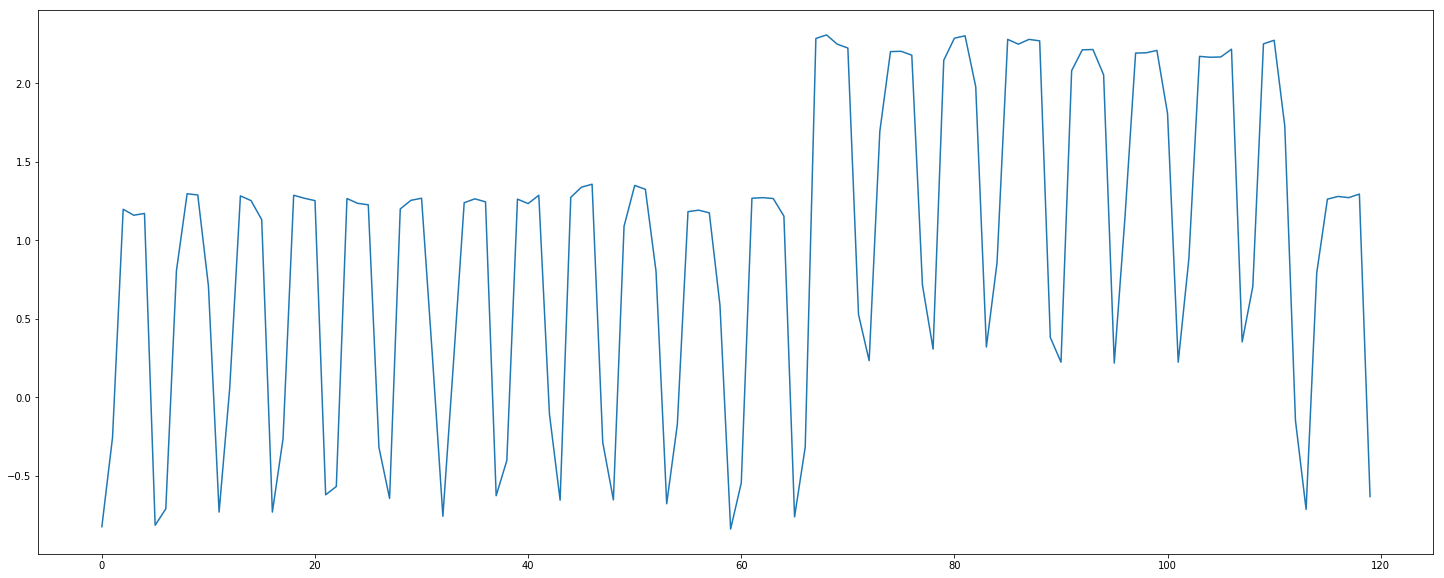

Cluster Size: 1 Cluster # 27


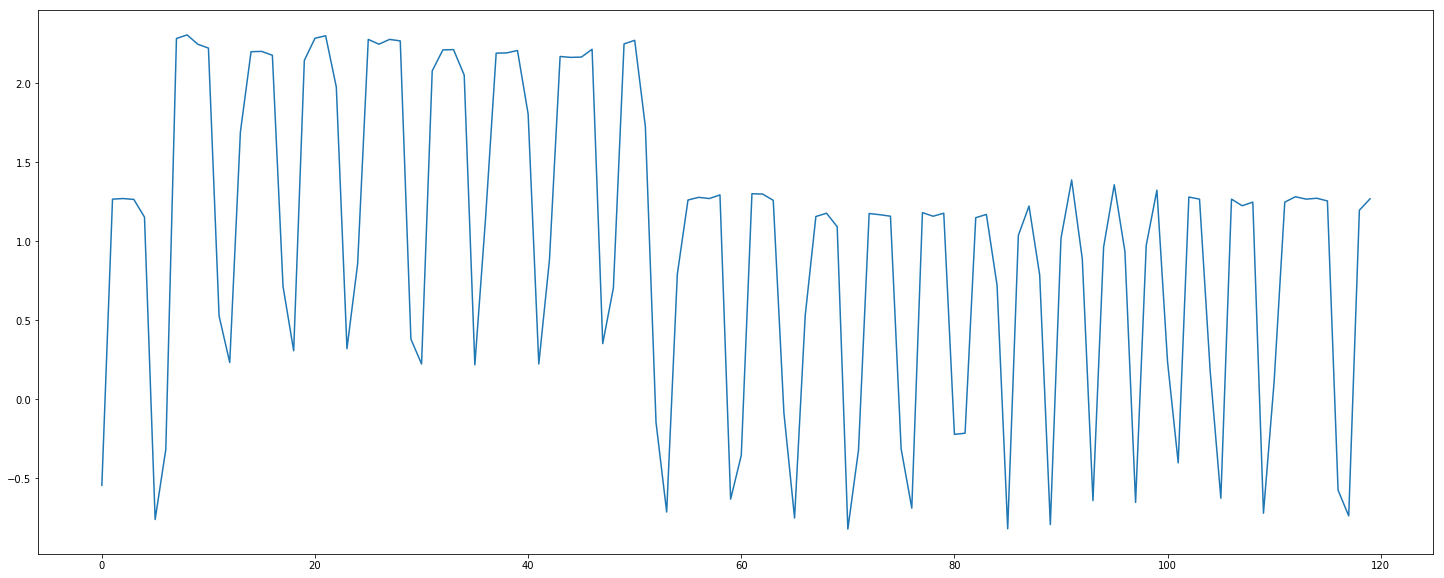

Cluster Size: 1 Cluster # 28


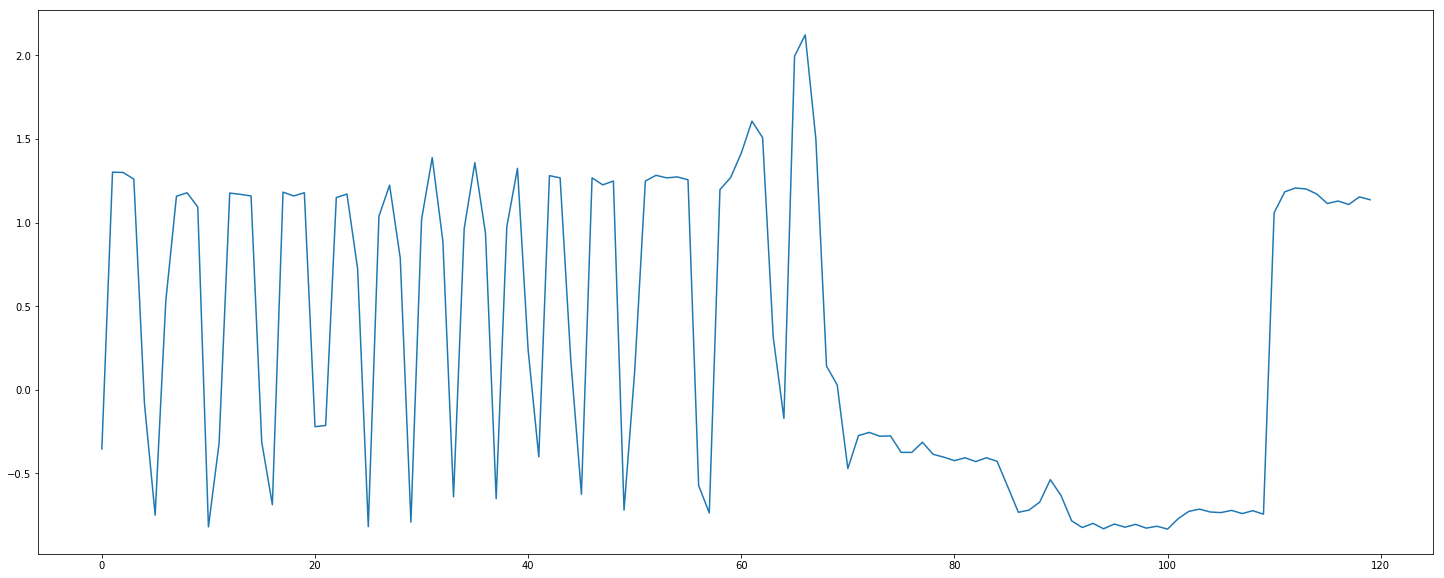

Cluster Size: 1 Cluster # 29


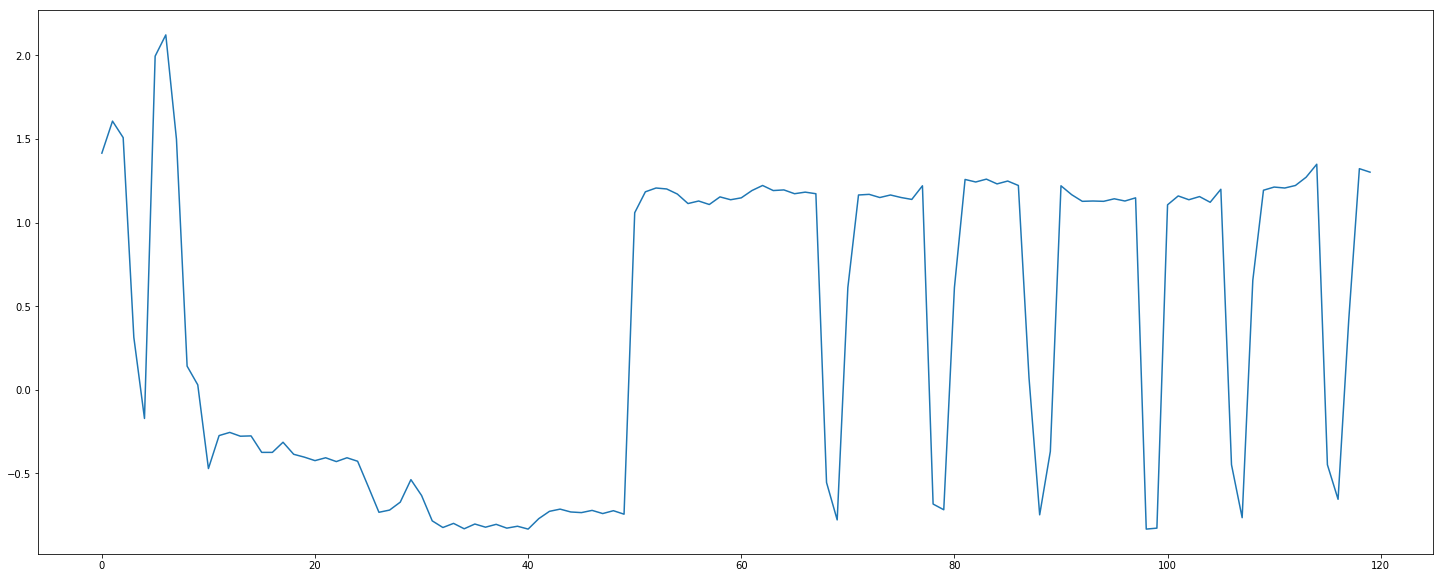

Cluster Size: 1 Cluster # 30


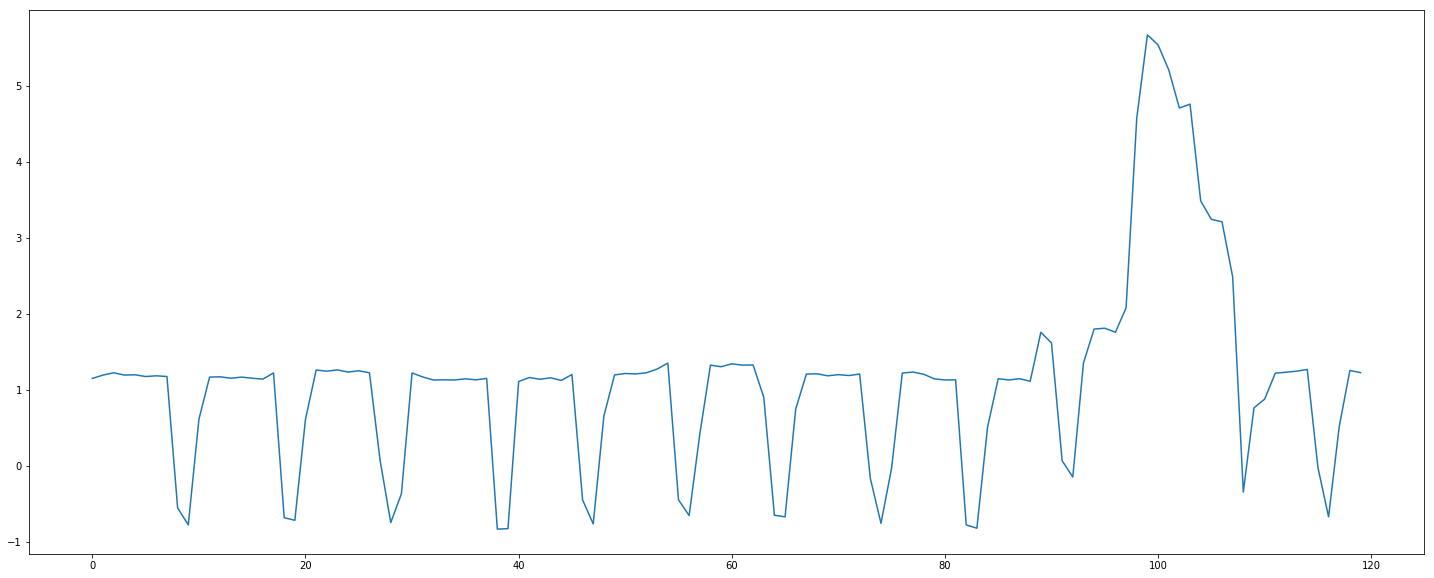

Cluster Size: 1 Cluster # 31


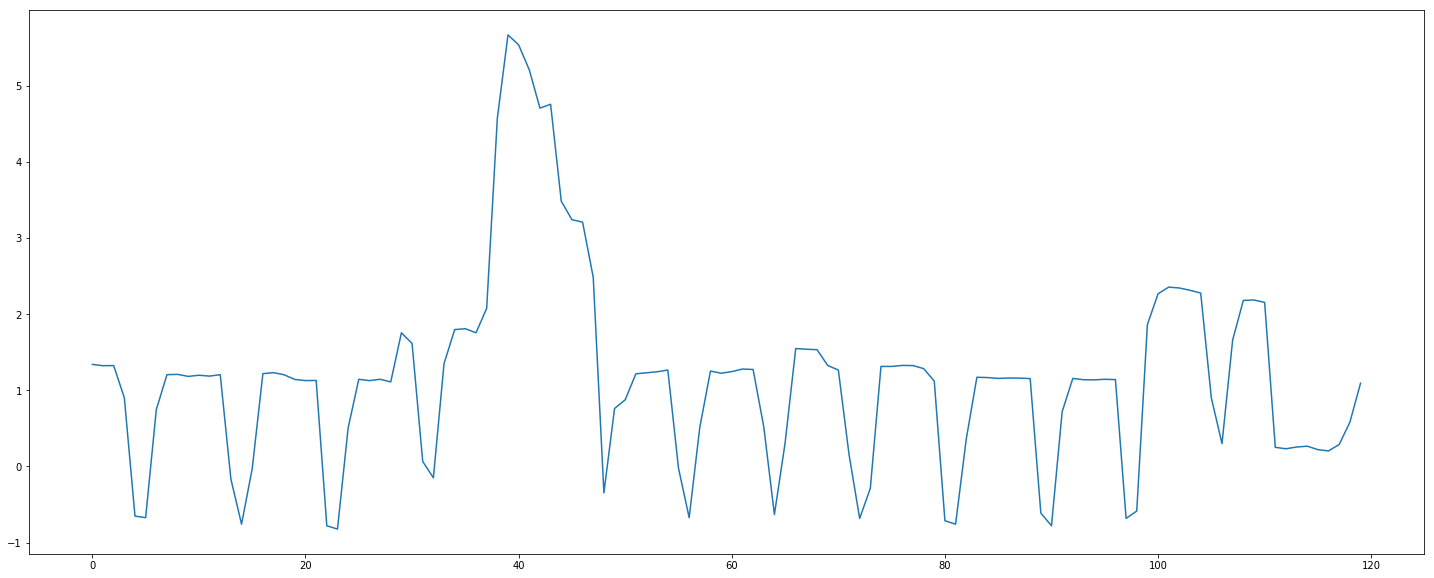

Cluster Size: 1 Cluster # 32


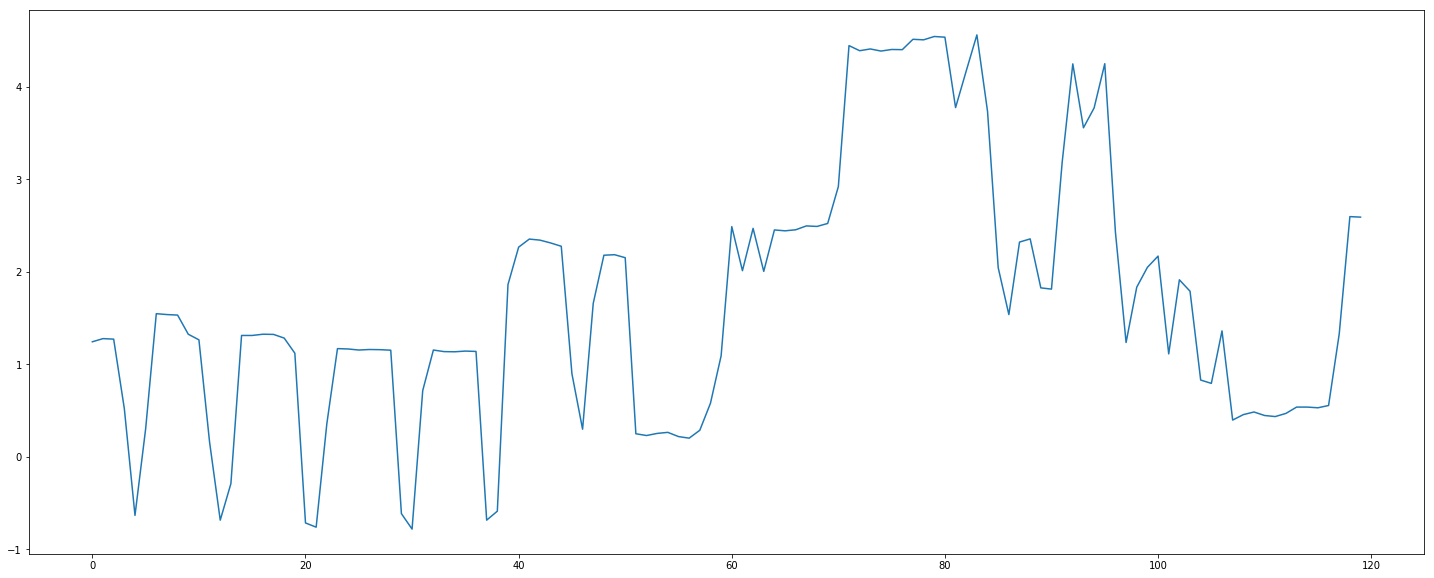

Cluster Size: 1 Cluster # 33


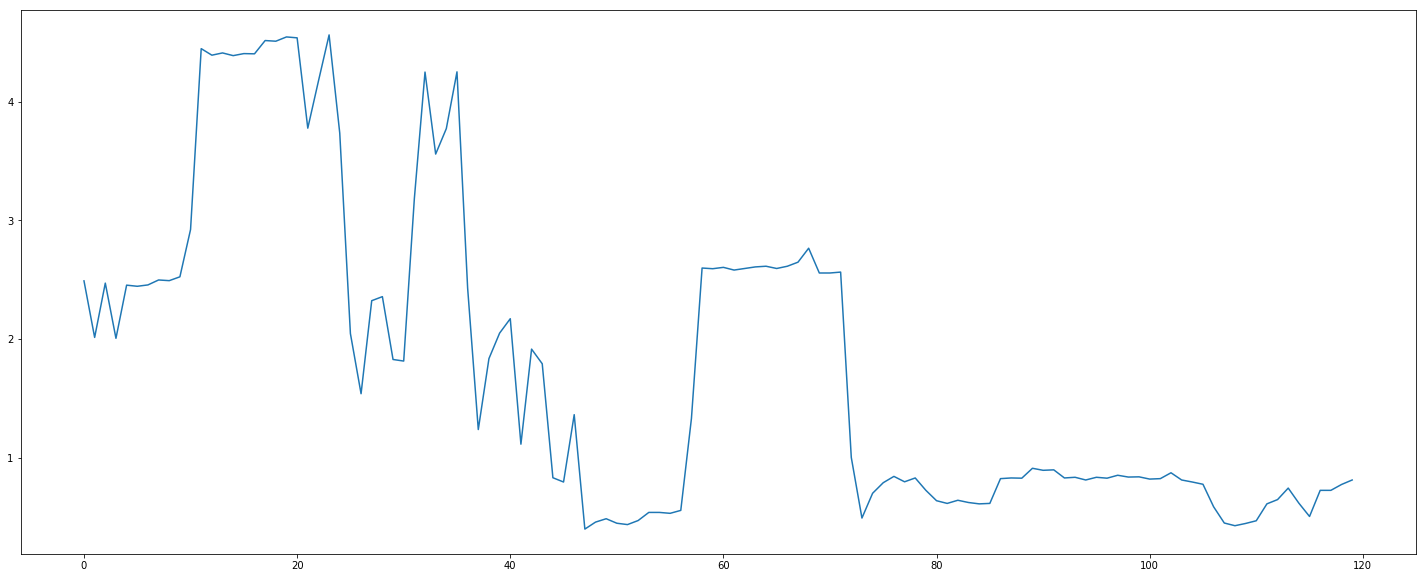

Cluster Size: 1 Cluster # 34


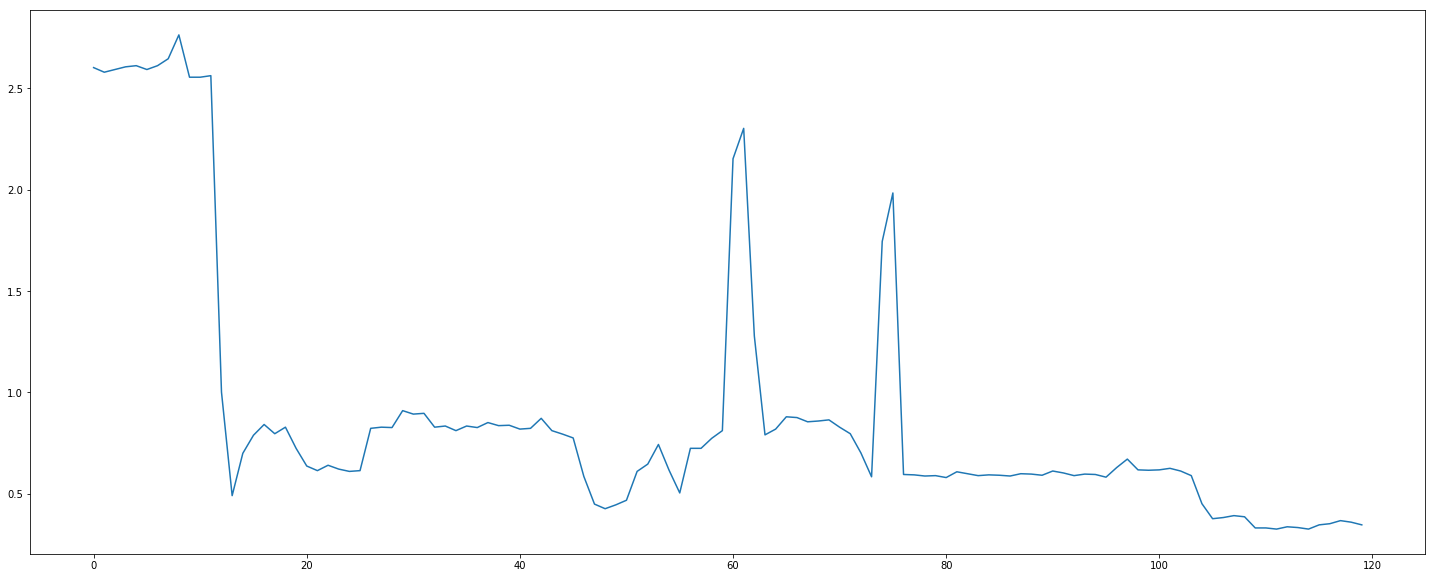

Cluster Size: 1 Cluster # 35


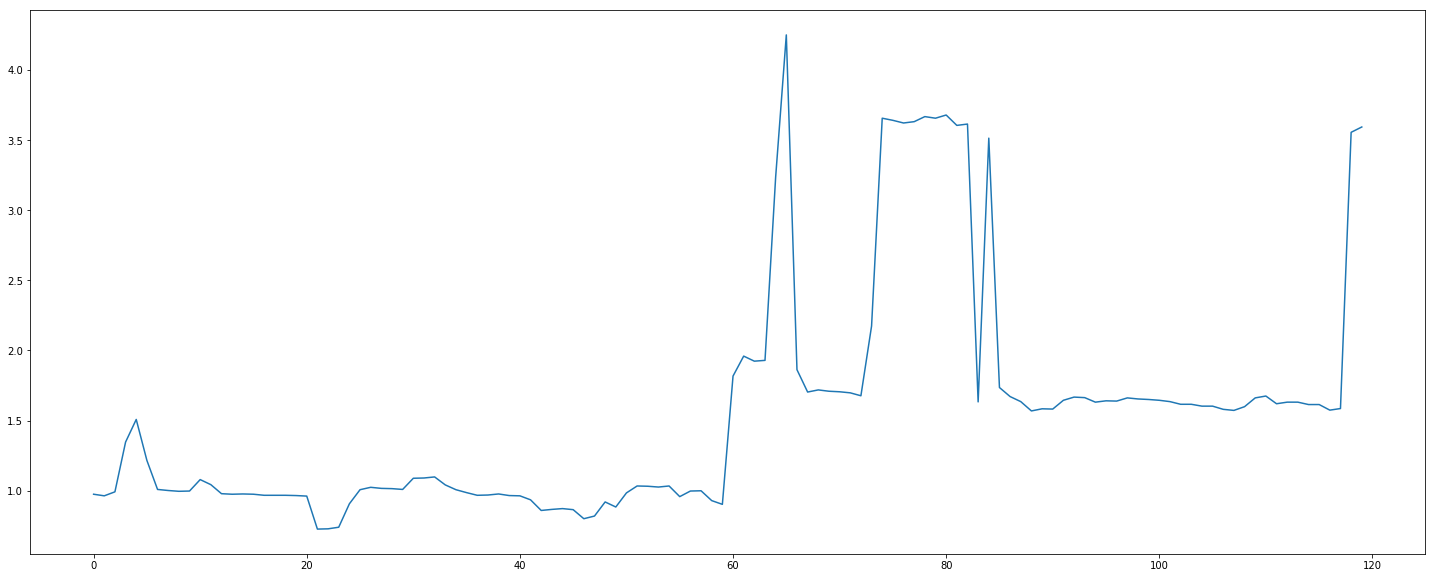

Cluster Size: 1 Cluster # 36


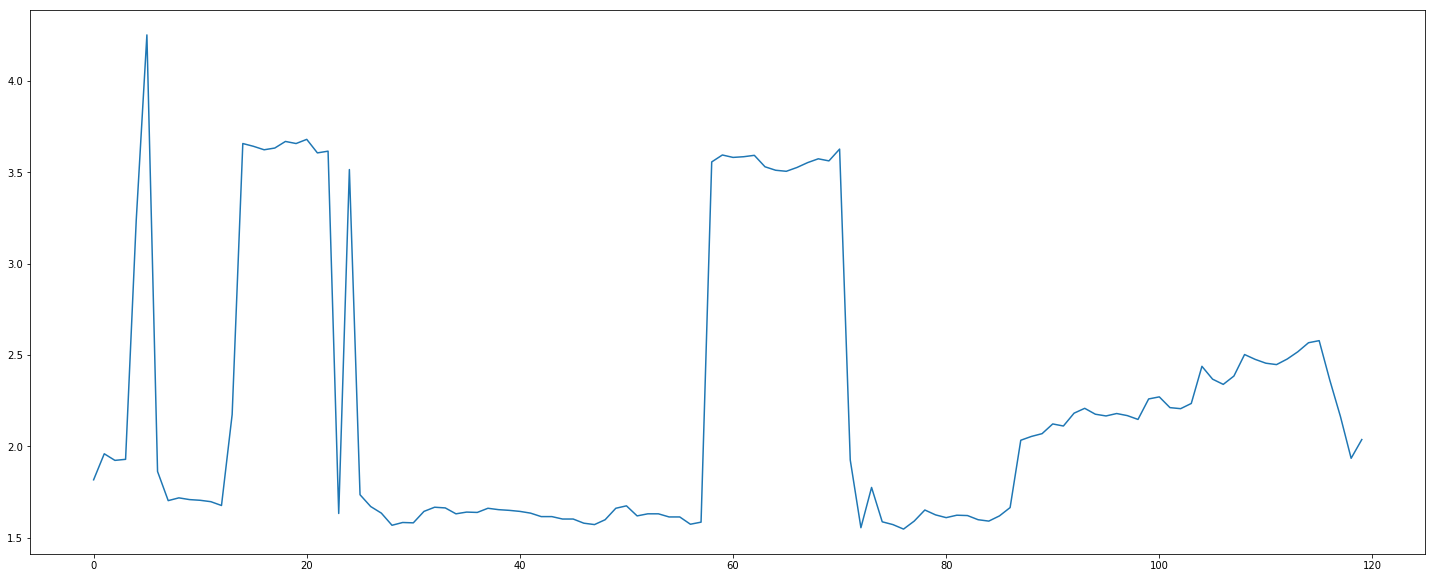

Cluster Size: 1 Cluster # 37


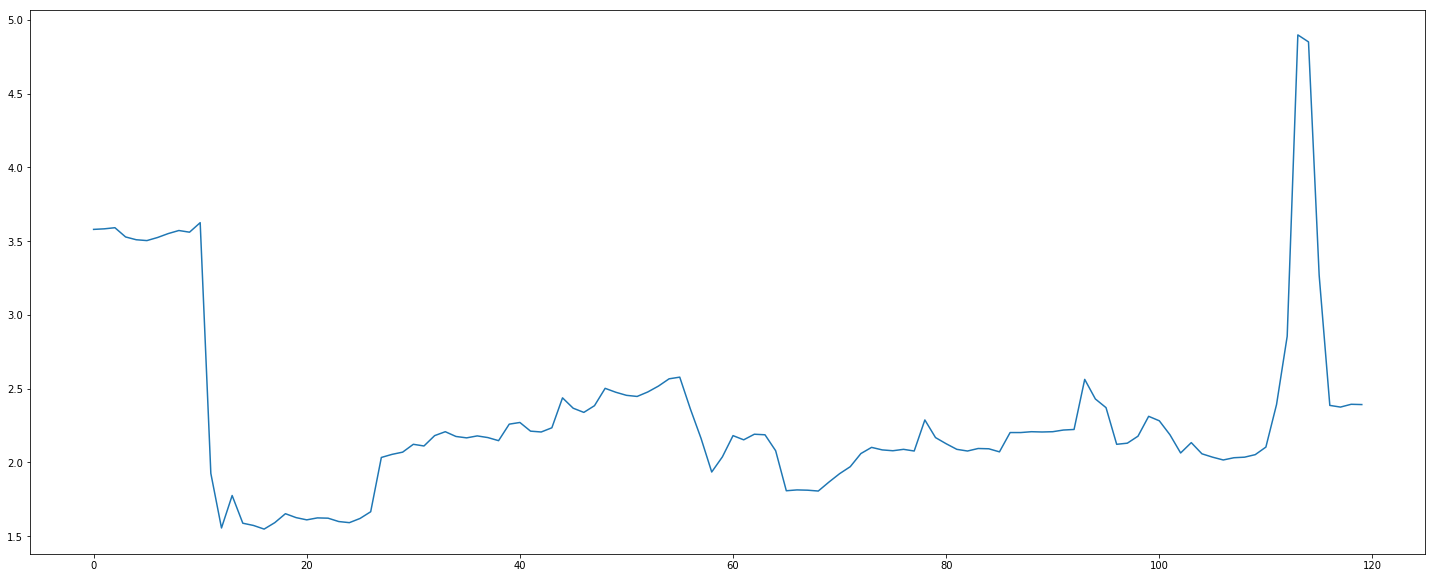

Cluster Size: 1 Cluster # 38


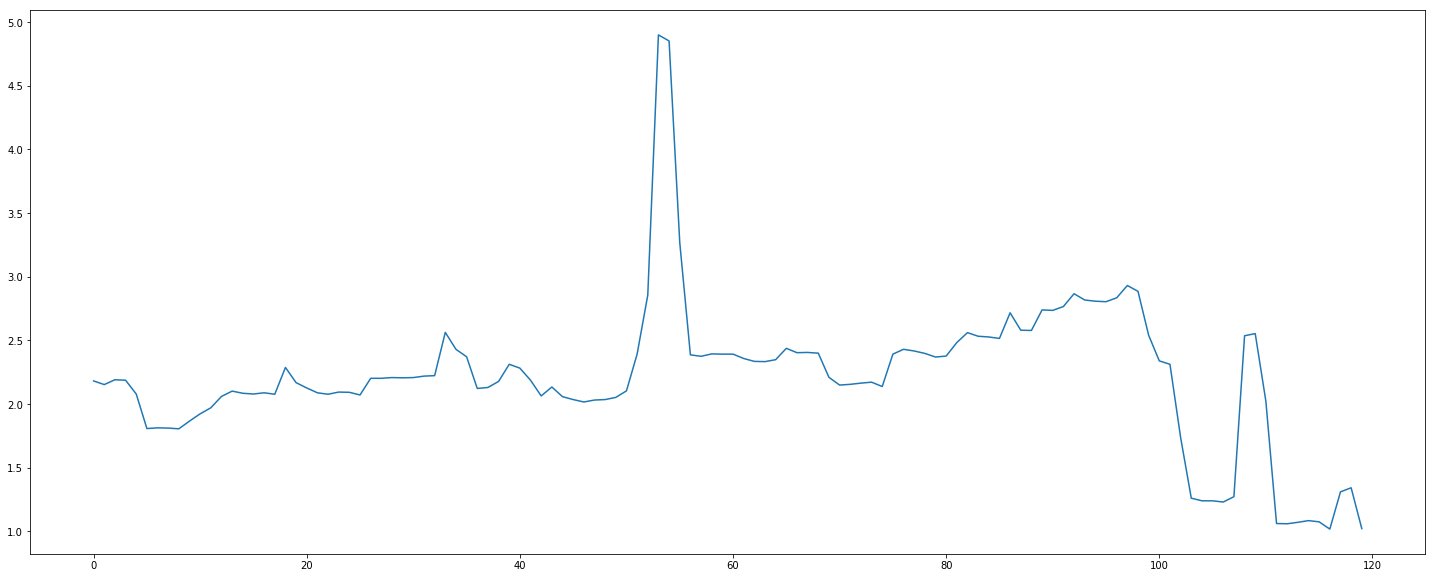

Cluster Size: 1 Cluster # 39


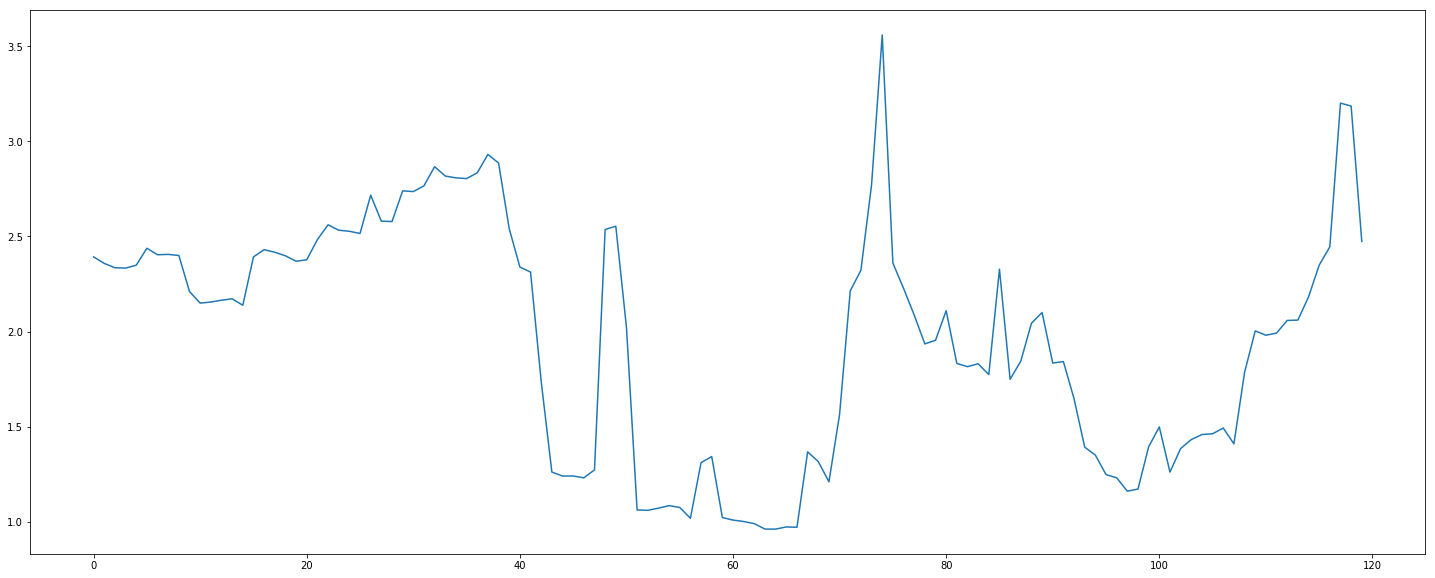

Cluster Size: 1 Cluster # 40


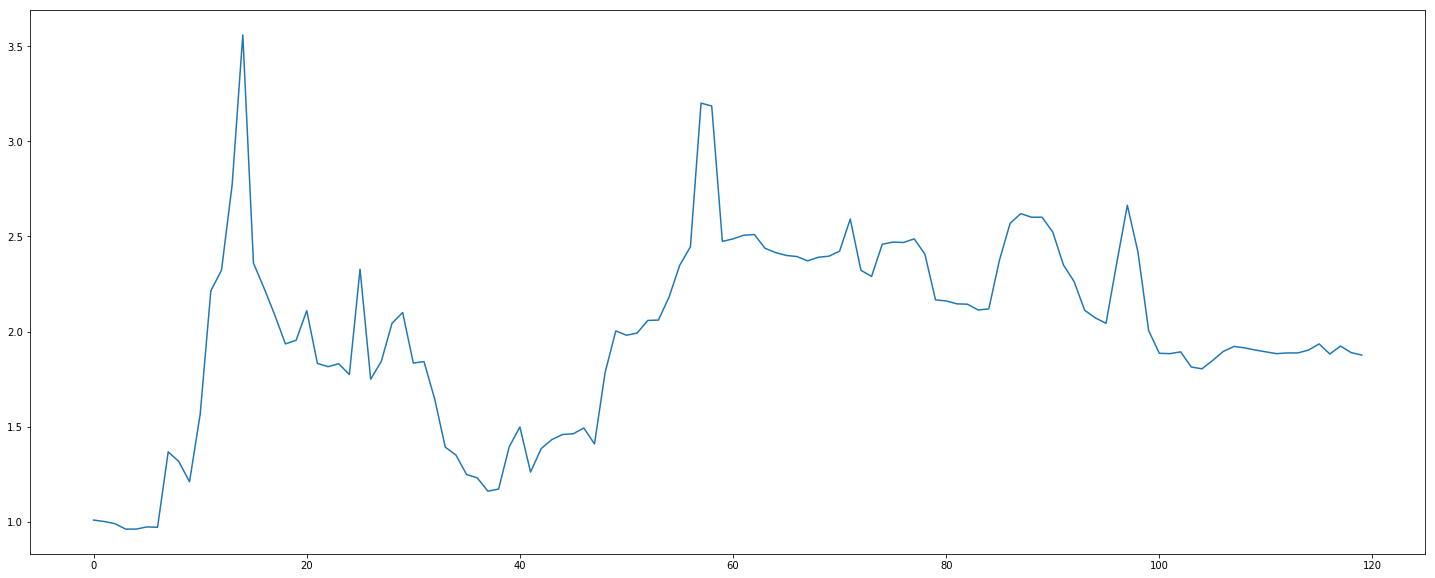

Cluster Size: 1 Cluster # 41


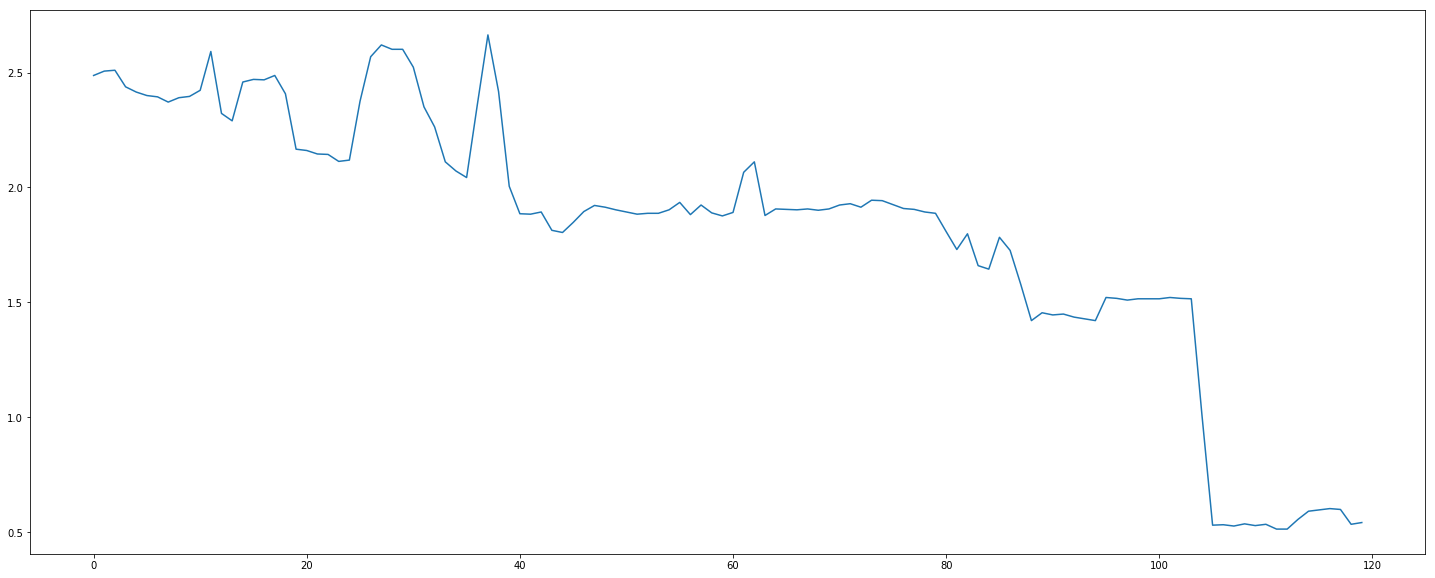

Cluster Size: 1 Cluster # 42


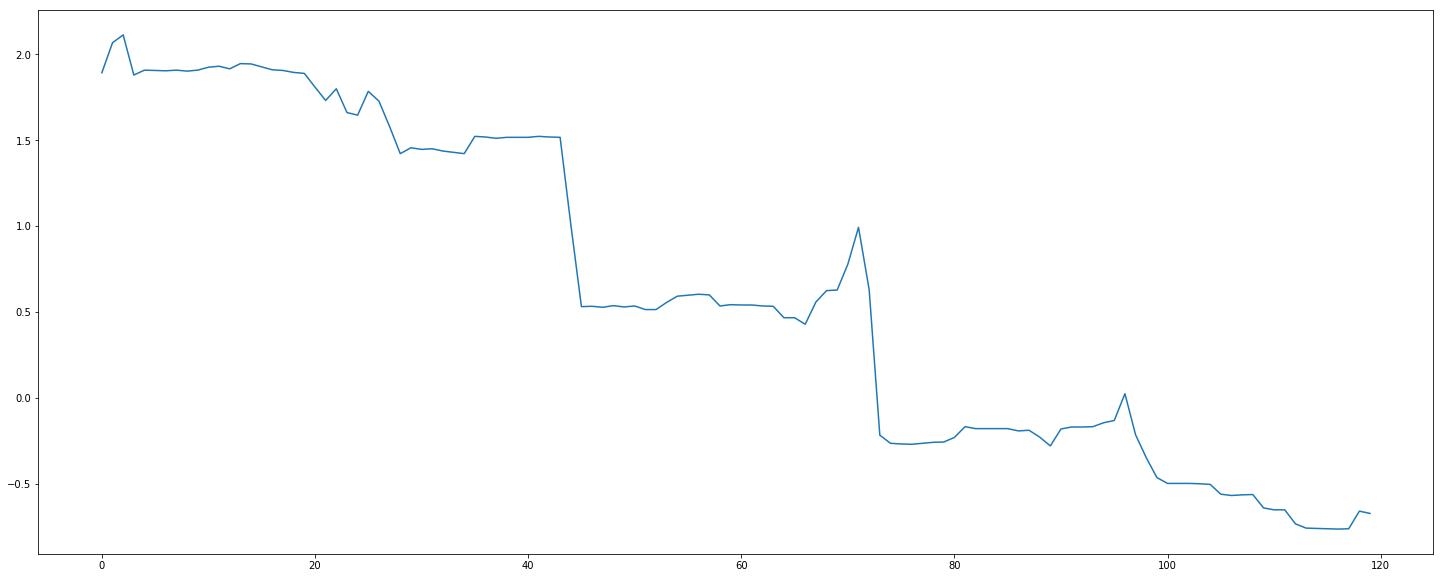

Cluster Size: 1 Cluster # 43


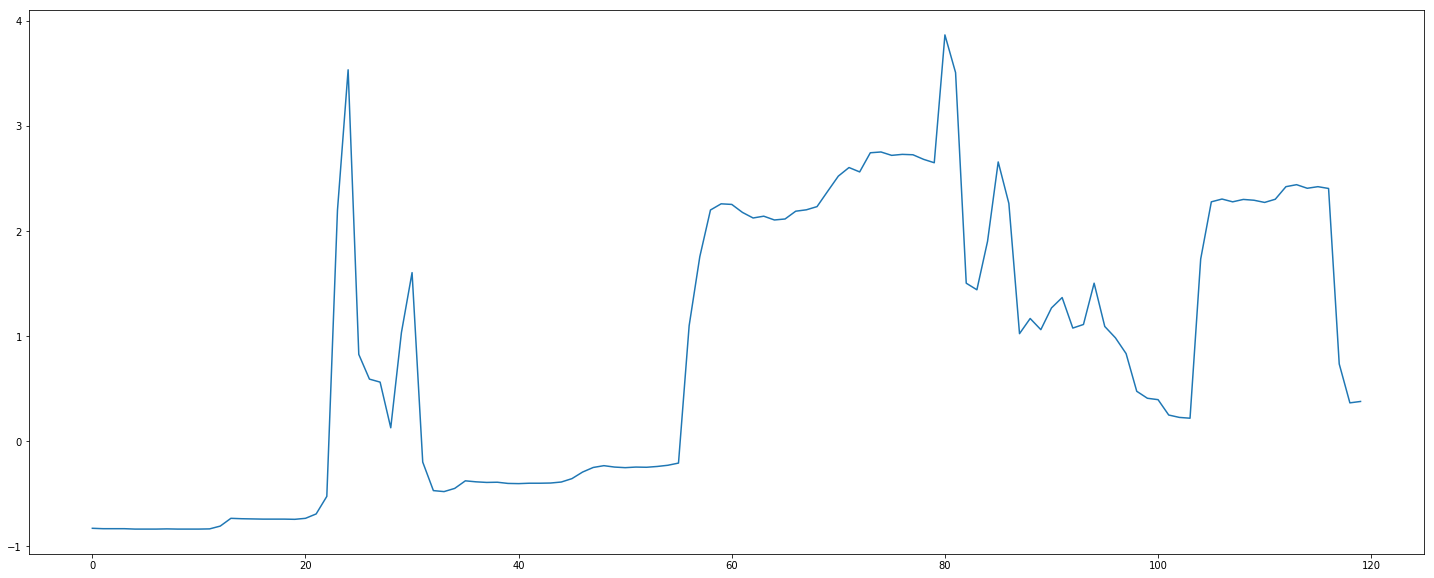

Cluster Size: 1 Cluster # 44


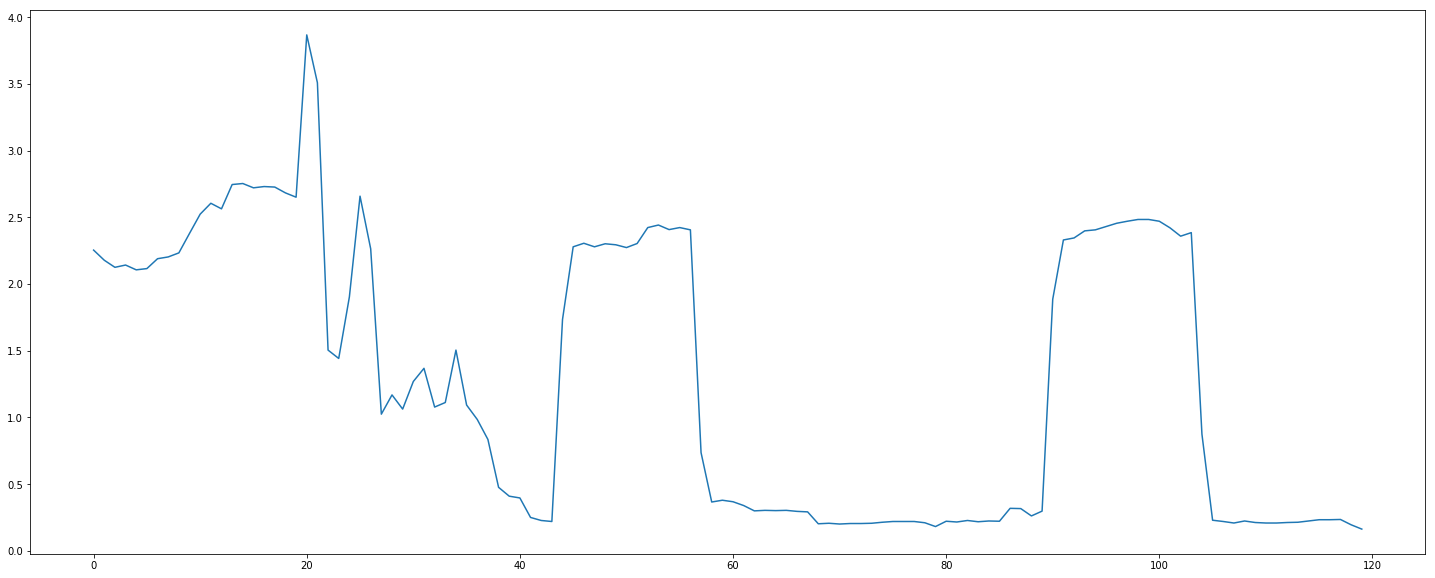

Cluster Size: 1 Cluster # 45


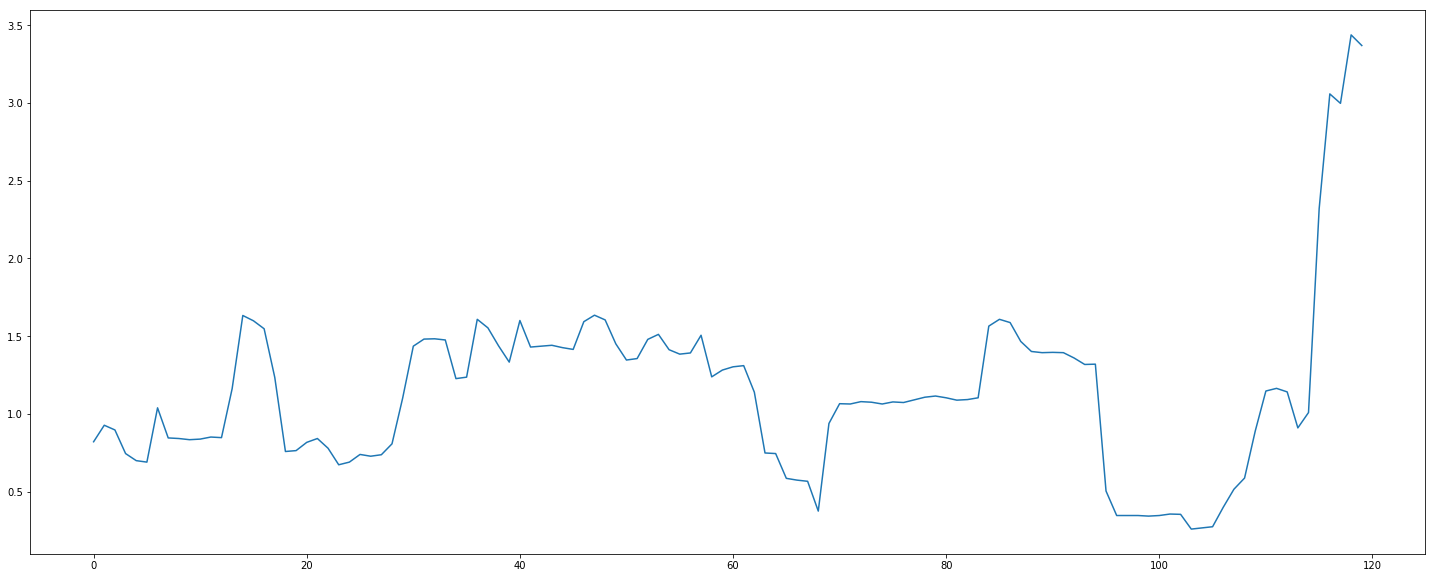

Cluster Size: 1 Cluster # 46


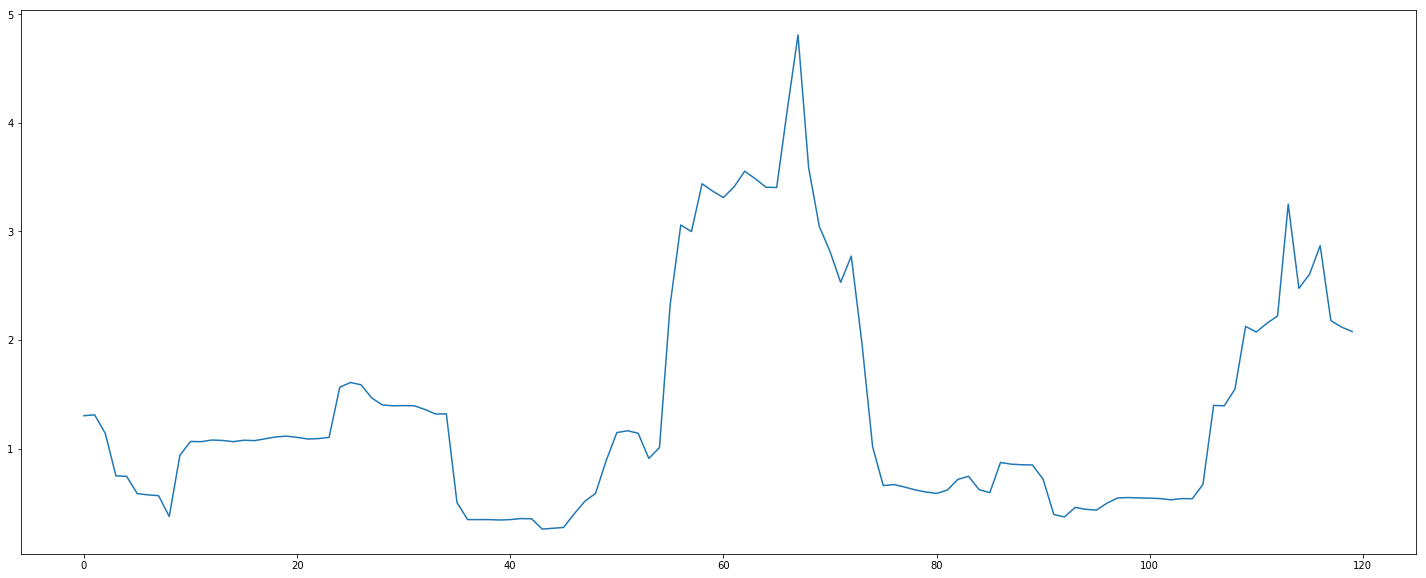

Cluster Size: 1 Cluster # 47


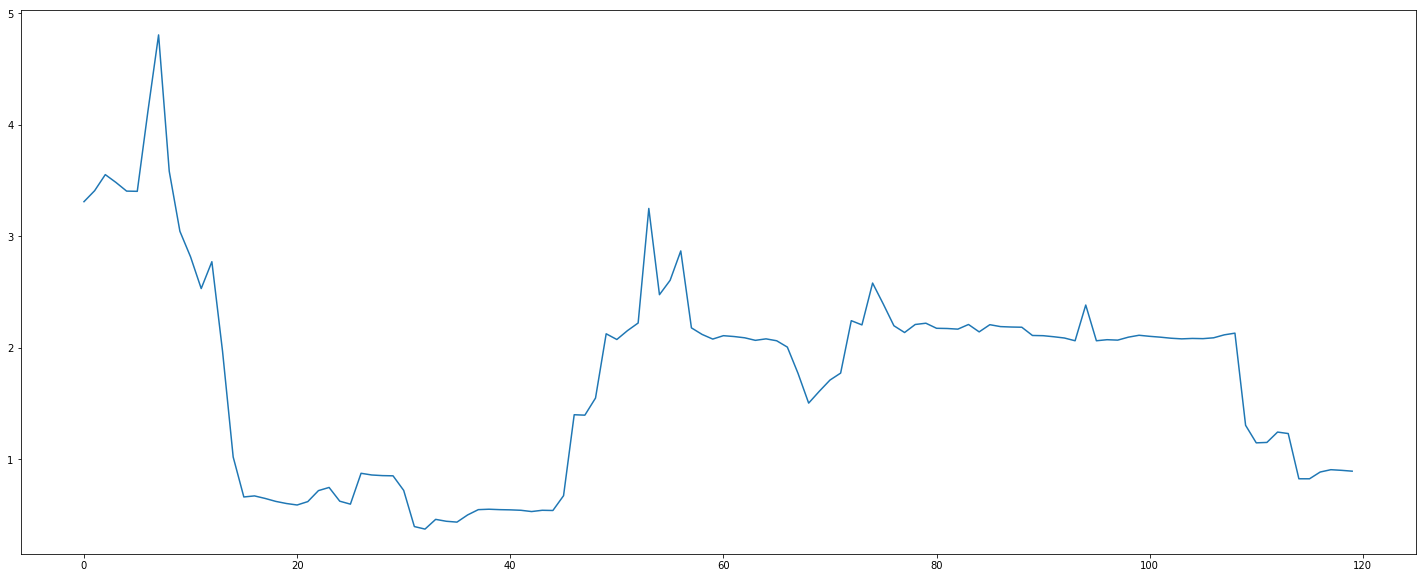

Cluster Size: 1 Cluster # 48


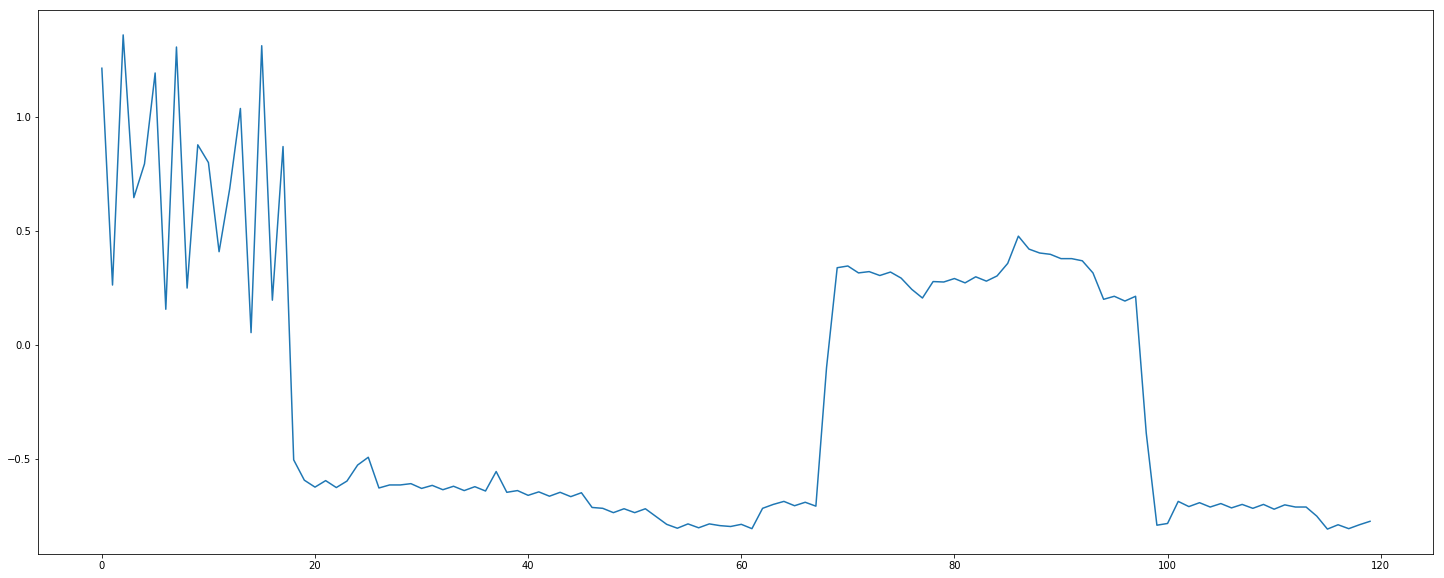

Cluster Size: 1 Cluster # 49


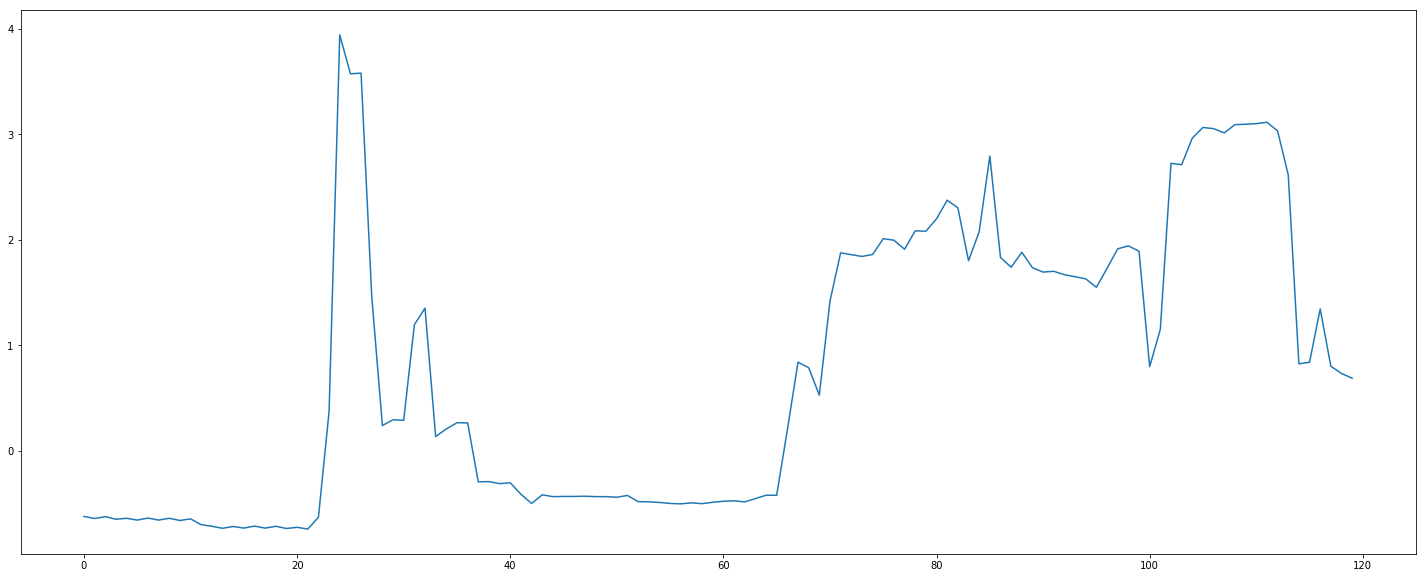

Cluster Size: 1 Cluster # 50


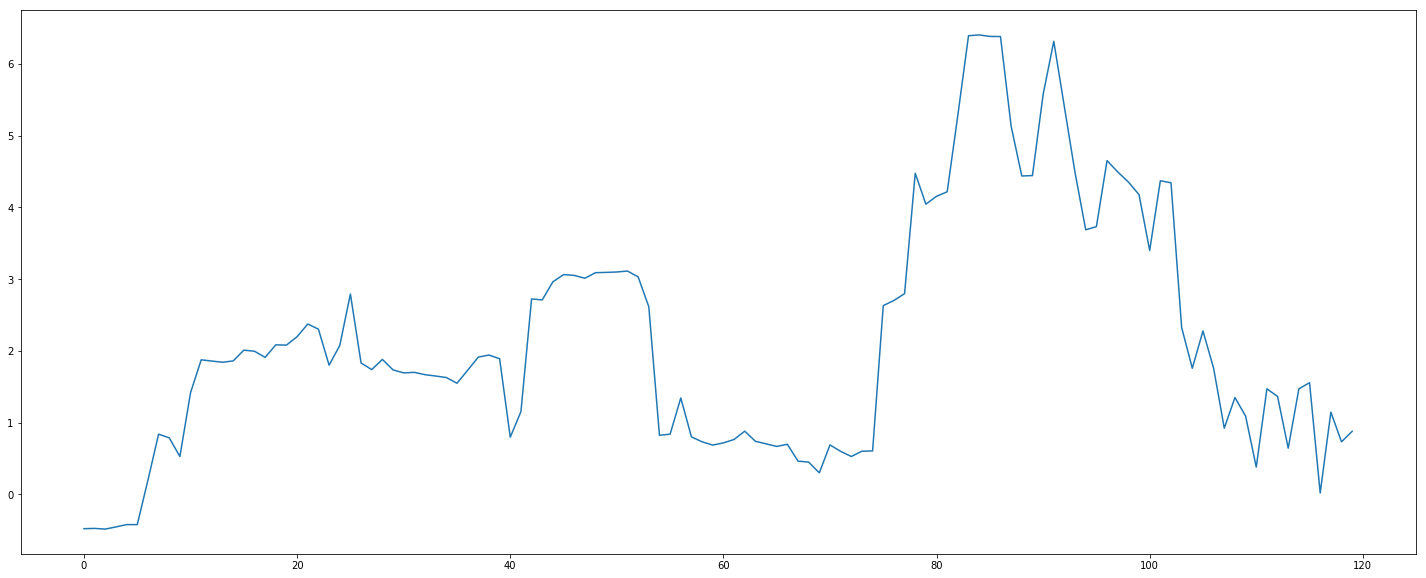

Cluster Size: 1 Cluster # 51


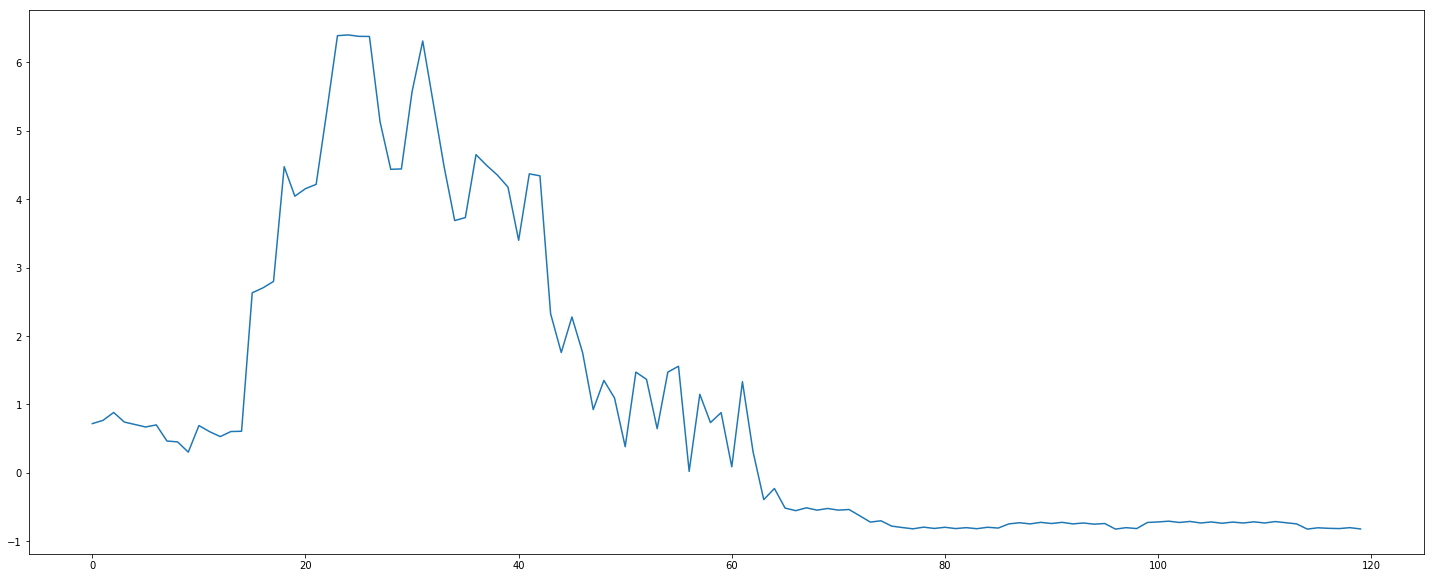

Cluster Size: 1 Cluster # 52


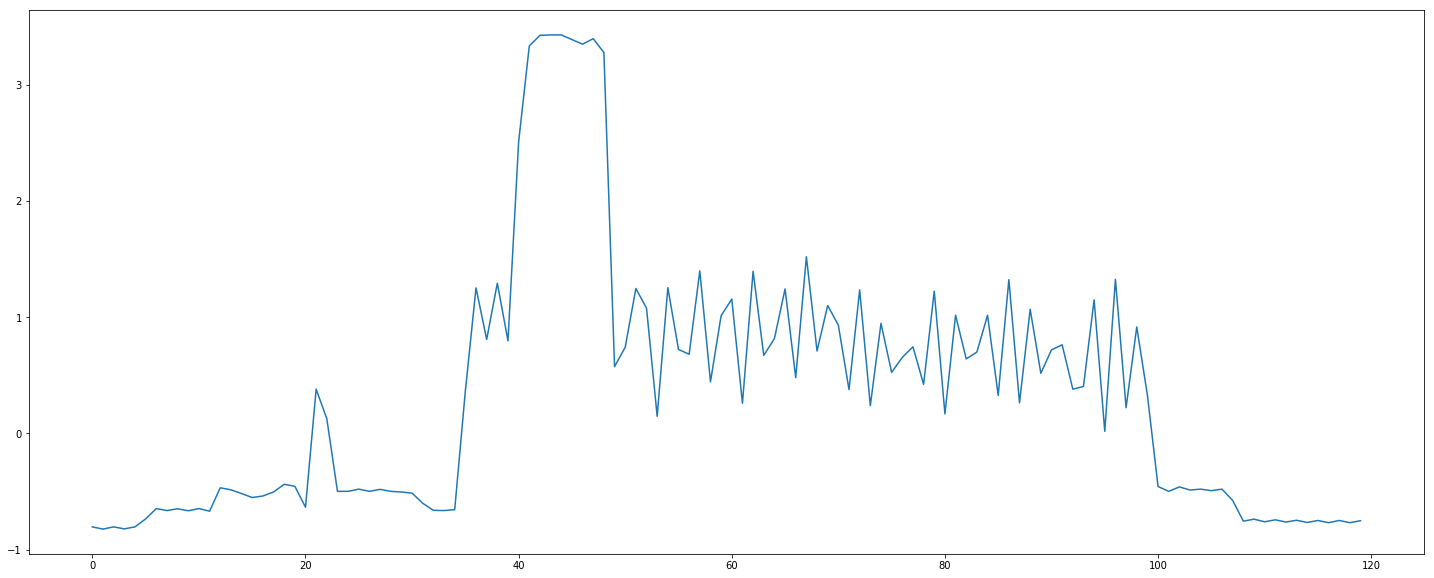

Cluster Size: 1 Cluster # 53


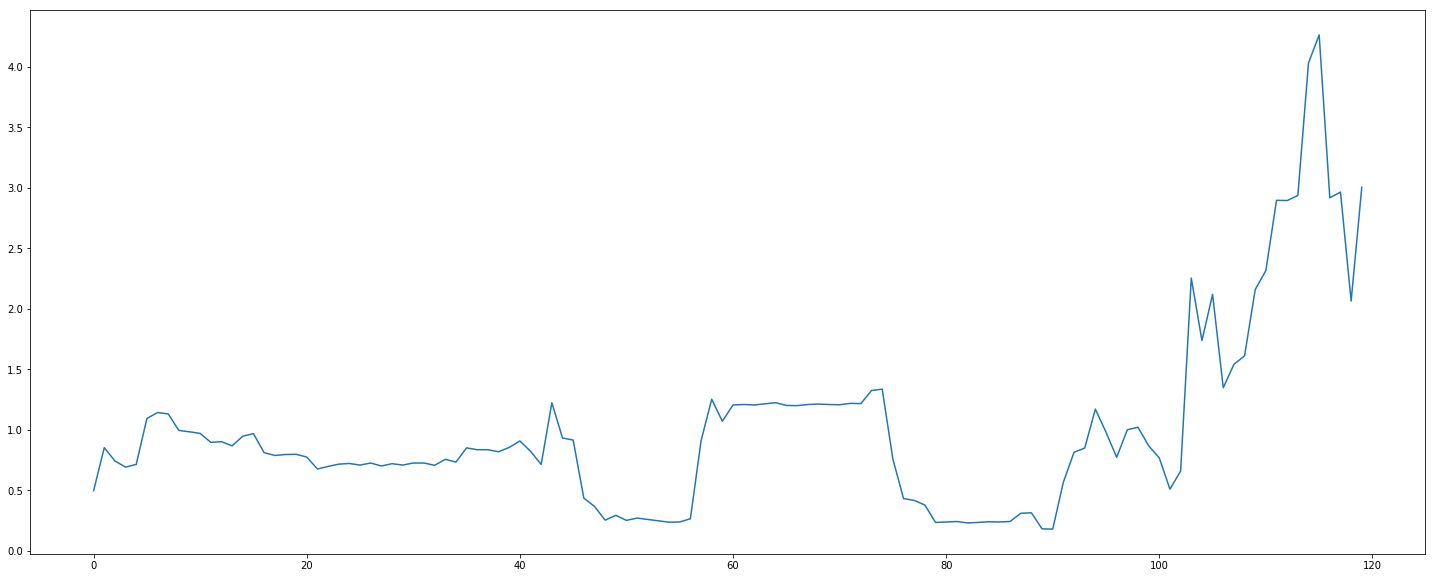

Cluster Size: 1 Cluster # 54


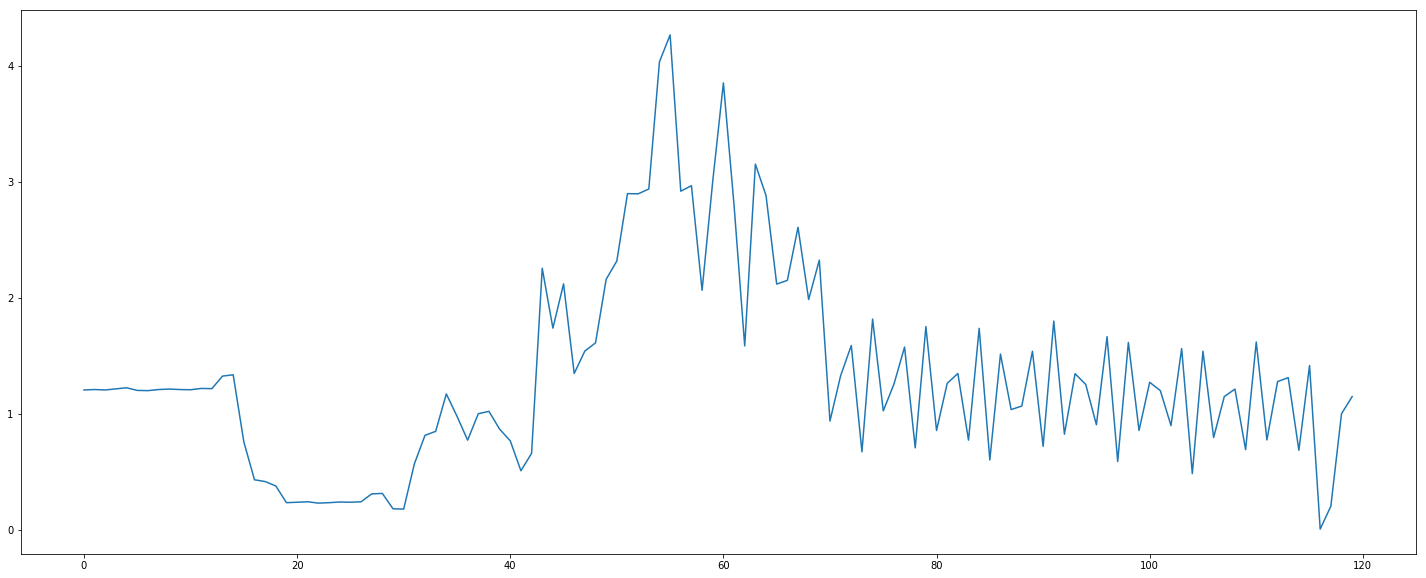

Cluster Size: 1 Cluster # 55


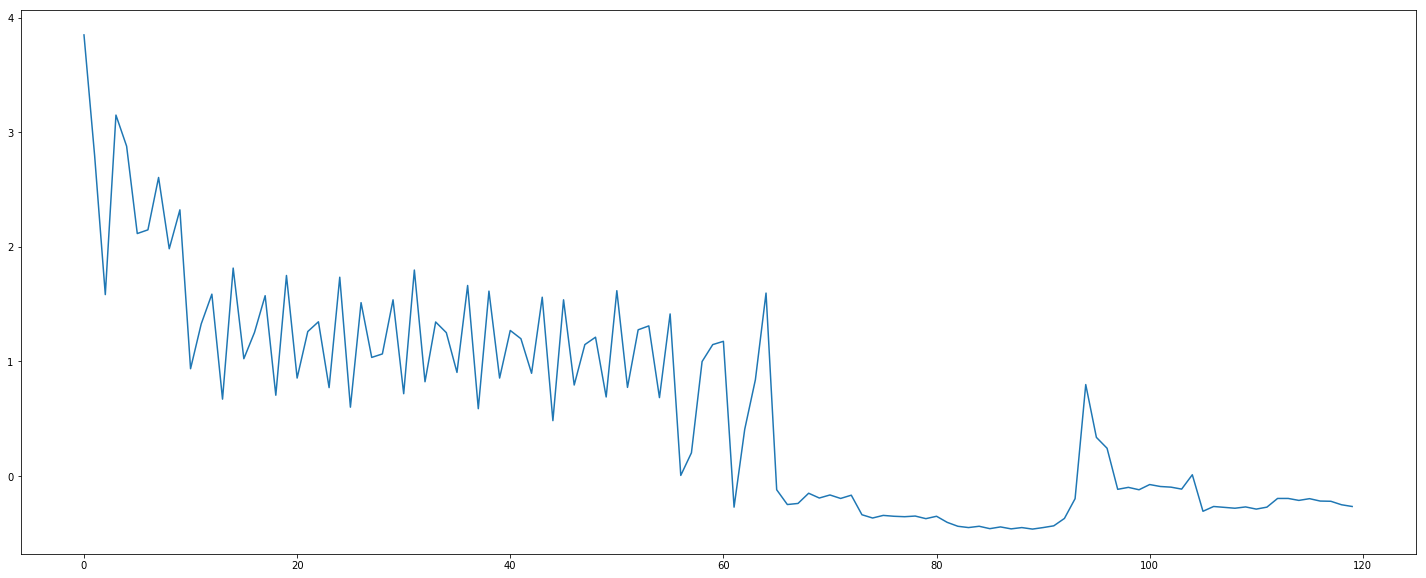

Cluster Size: 1 Cluster # 56


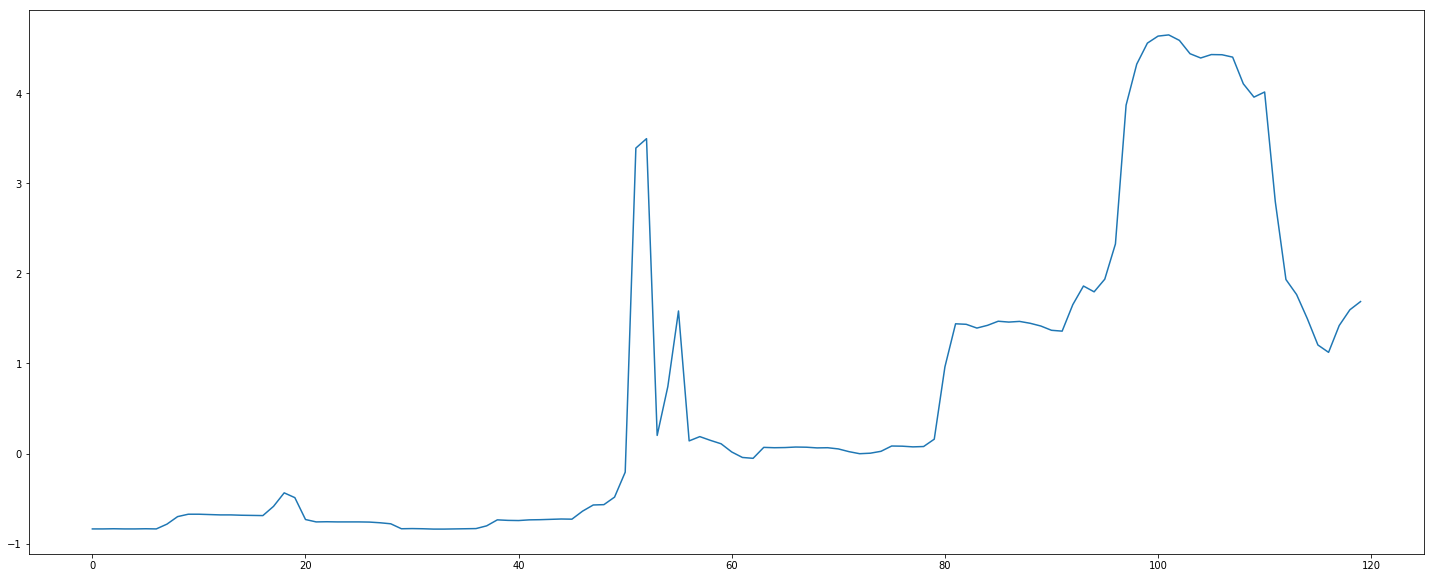

Cluster Size: 1 Cluster # 57


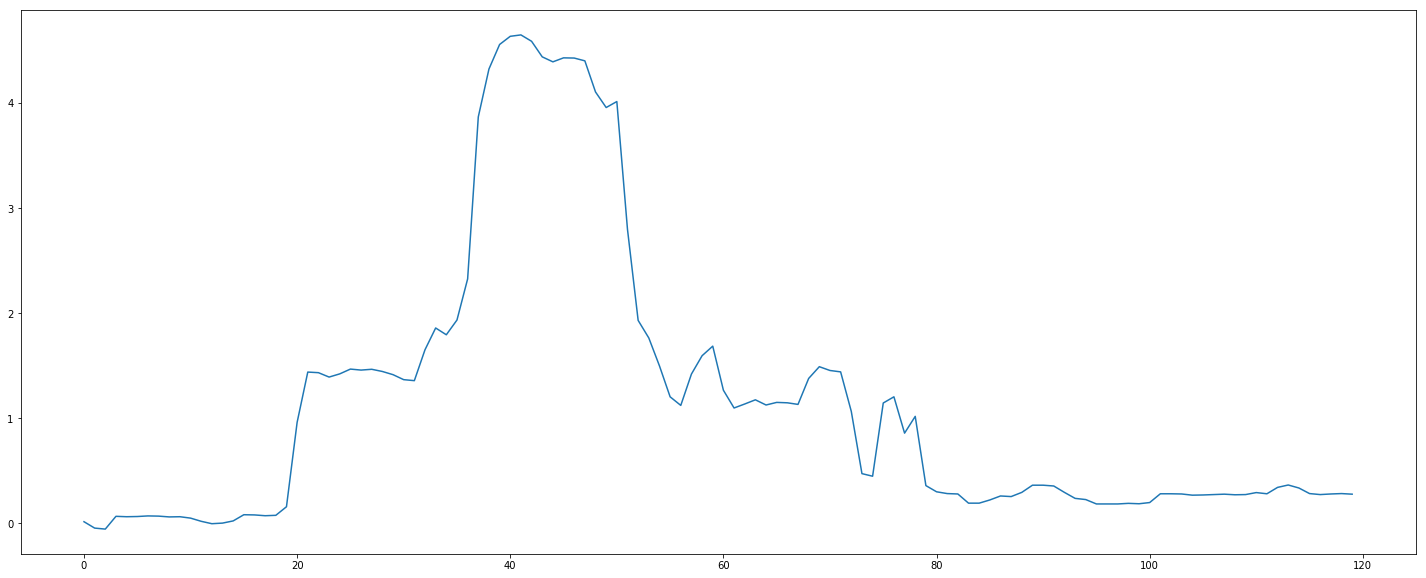

Cluster Size: 1 Cluster # 58


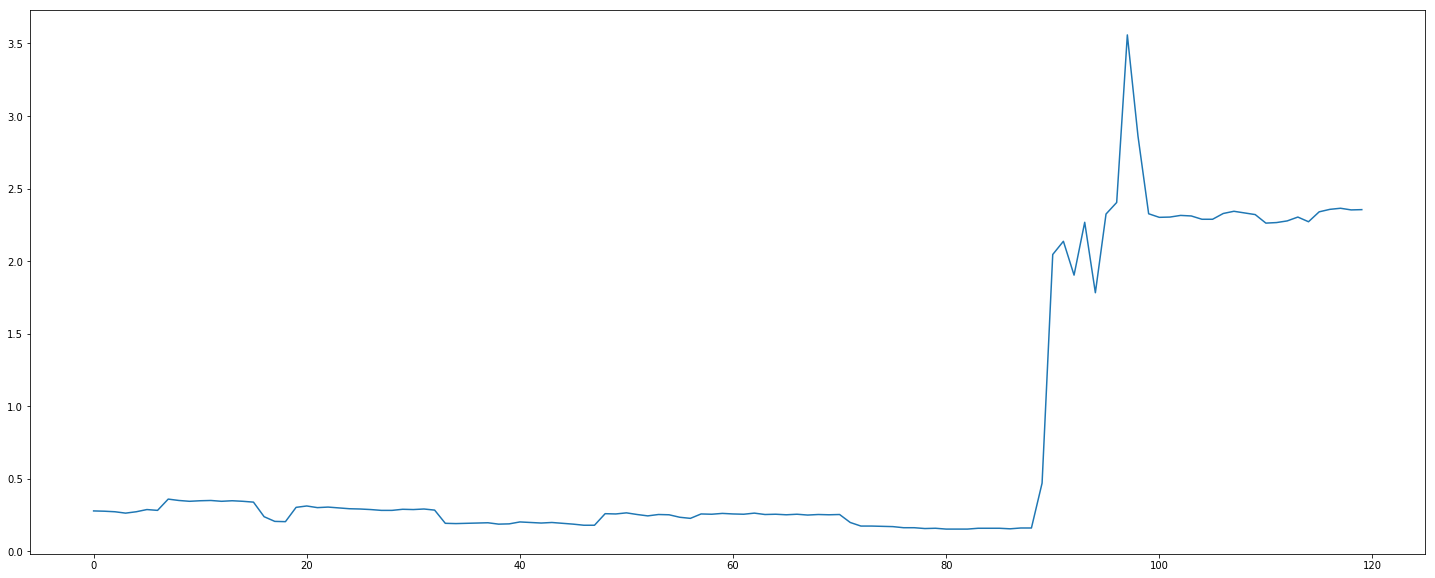

Cluster Size: 1 Cluster # 59


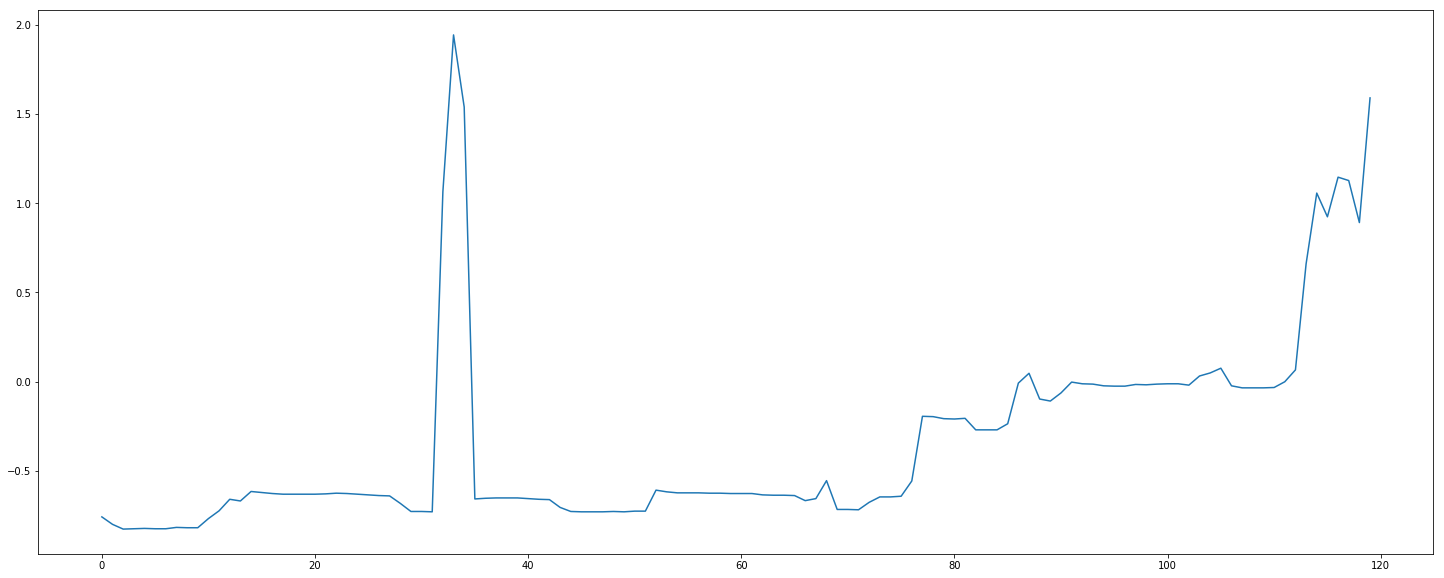

Cluster Size: 1 Cluster # 60


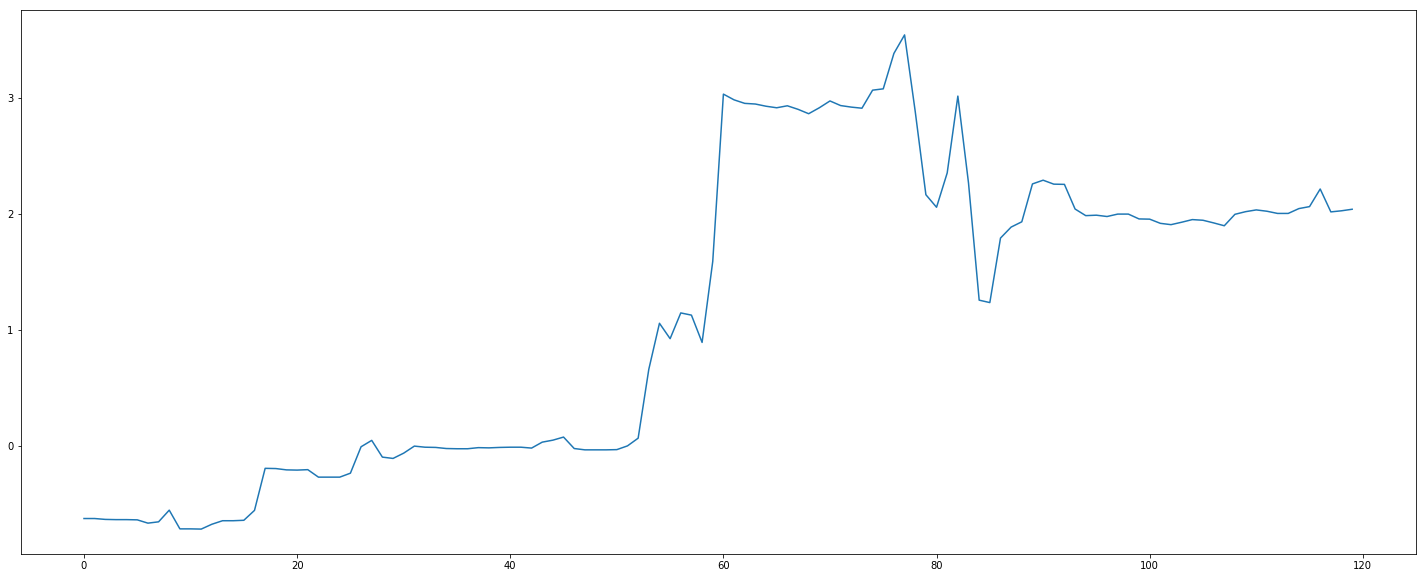

Cluster Size: 1 Cluster # 61


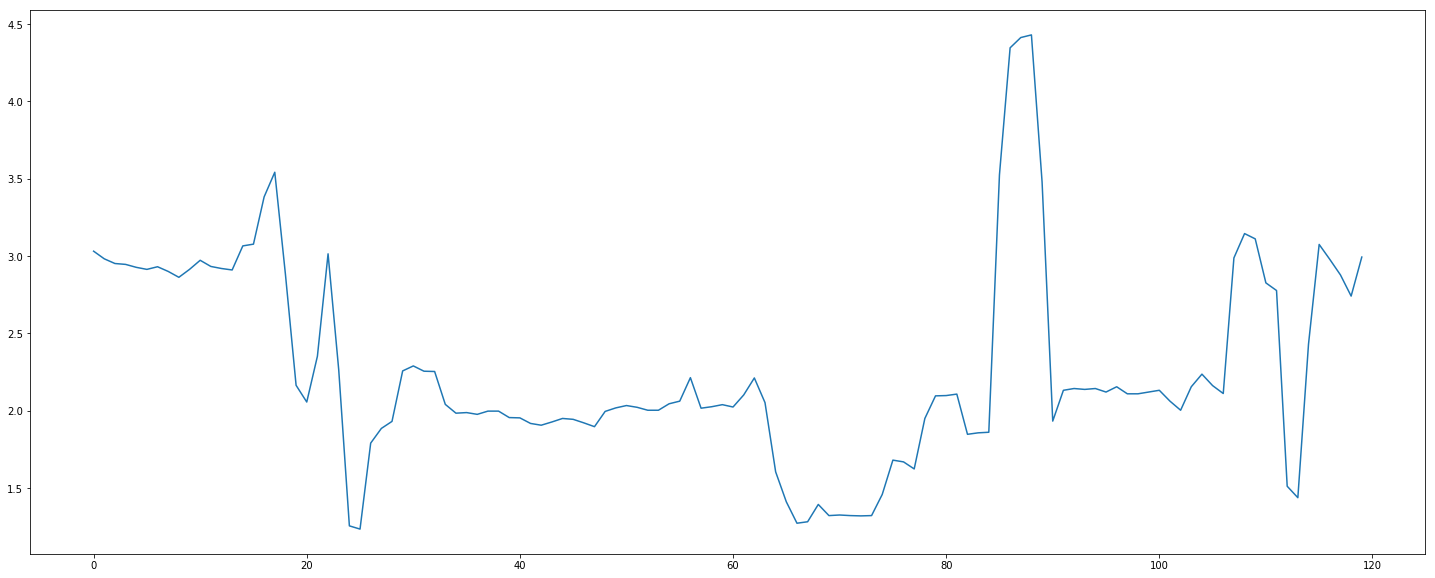

Cluster Size: 0 Cluster # 62


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 63


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 64


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 65


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 66


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 67


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 68


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 69


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 70


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 71


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 72


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 73


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 74


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 75


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 76


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 77


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 78


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 79


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 80


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 81


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 82


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 83


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 84


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 85


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 86


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 87


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 88


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 89


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 90


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 91


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 92


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 93


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 94


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 95


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 96


<Figure size 1800x720 with 0 Axes>

Cluster Size: 0 Cluster # 97


<Figure size 1800x720 with 0 Axes>

In [77]:
print("Wavelet Count",len(X),"Cluster Count:", len(density_clusters), "Cluster size cut off:", cut_off, "EPS: ", eps)
count = 0
label = []
for i in sorted(density_clusters, key=len, reverse=True):
    print("Cluster Size:", len(i), "Cluster #", count)
    count+=1
    plt.figure(figsize=(25,10))
    for j in i:
        labels = plt.plot(X[int(j)], label='Line '+str(j))
        label.append(labels[0])
   

    plt.show()
    label = []

8
